# Membres de l'équipe 3:
    - Mamadou Taslima Diallo (diam3602)
    - Mariem Kallel (kalm7073)
    - Mazen Ben Hmida (benm3414)
    - Nour El Houda Taouali (taon1301)

# Import des librairies utilisés.

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# from sklearn.metrics import accuracy_score
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.neighbors import RadiusNeighborsClassifier
# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.ensemble import RandomForestClassifier
# from scipy.stats import f_oneway
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from scipy.spatial.distance import cdist, mahalanobis

# from sklearn.experimental import enable_iterative_imputer  # Ceci suffit pour activer IterativeImputer
# from sklearn.impute import SimpleImputer, IterativeImputer
# from sklearn.ensemble import RandomForestRegressor

# Chargement des données d'entraînement.

In [107]:
data = pd.read_csv("owid-co2-data.csv", delimiter=",", header=0)
data

country  year iso_code  population           gdp  cement_co2  \
0      Afghanistan  1850      AFG   3752993.0           NaN         NaN   
1      Afghanistan  1851      AFG   3767956.0           NaN         NaN   
2      Afghanistan  1852      AFG   3783940.0           NaN         NaN   
3      Afghanistan  1853      AFG   3800954.0           NaN         NaN   
4      Afghanistan  1854      AFG   3818038.0           NaN         NaN   
...            ...   ...      ...         ...           ...         ...   
48053     Zimbabwe  2018      ZWE  15052191.0  2.271535e+10       0.558   
48054     Zimbabwe  2019      ZWE  15354606.0           NaN       0.473   
48055     Zimbabwe  2020      ZWE  15669663.0           NaN       0.496   
48056     Zimbabwe  2021      ZWE  15993525.0           NaN       0.531   
48057     Zimbabwe  2022      ZWE  16320539.0           NaN       0.531   

       cement_co2_per_capita     co2  co2_growth_abs  co2_growth_prct  ...  \
0                        NaN     NaN             NaN              NaN  ...   
1                        NaN     NaN             NaN              NaN  ...   
2                        NaN     NaN             NaN              NaN  ...   
3                        NaN     NaN             NaN              NaN  ...   
4                        NaN     NaN             NaN              NaN  ...   
...                      ...     ...             ...              ...  ...   
48053                  0.037  10.715           1.419           15.265  ...   
48054                  0.031   9.775          -0.939           -8.765  ...   
48055                  0.032   7.850          -1.926          -19.700  ...   
48056                  0.033   8.396           0.547            6.962  ...   
48057                  0.033   8.856           0.460            5.477  ...   

       share_global_other_co2  share_of_temperature_change_from_ghg  \
0                         NaN                                   NaN   
1                         NaN                                 0.165   
2                         NaN                                 0.164   
3                         NaN                                 0.164   
4                         NaN                                 0.163   
...                       ...                                   ...   
48053                     NaN                                 0.114   
48054                     NaN                                 0.113   
48055                     NaN                                 0.112   
48056                     NaN                                 0.111   
48057                     NaN                                   NaN   

       temperature_change_from_ch4  temperature_change_from_co2  \
0                              NaN                          NaN   
1                            0.000                        0.000   
2                            0.000                        0.000   
3                            0.000                        0.000   
4                            0.000                        0.000   
...                            ...                          ...   
48053                        0.001                        0.001   
48054                        0.001                        0.001   
48055                        0.001                        0.001   
48056                        0.001                        0.001   
48057                          NaN                          NaN   

       temperature_change_from_ghg  temperature_change_from_n2o  total_ghg  \
0                              NaN                          NaN        NaN   
1                            0.000                          0.0        NaN   
2                            0.000                          0.0        NaN   
3                            0.000                          0.0        NaN   
4                            0.000                          0.0        NaN   
...                            ...             

In [108]:
fig = px.scatter_geo(data[data["co2"] >= 0], 
    locations="iso_code", 
    color="co2", 
    hover_name="country", 
    size="co2",
    projection="natural earth",
    title="Émissions de CO2 par pays",
    color_continuous_scale="Viridis", 
    size_max=50) 

fig.show()

L'observation des émissions de co2 par pays, nous permet de voir que les émissions sur les continents Amérique et l'Asie sont les plus polluants sur la planète, notamment les USA et la Chine en tête de pollution. Ceci peut s'expliquer par le haut niveau d'industrialisation de ses Etats. Mais il faut faire attention c'est résultat aussi peut légerement changer, notamment du fait de manque de données sur les émissions réels de certains pays en Afrique et en Amérique du sud.

# Visualisation des données

## 1. Représentation des données

### a) Analyse de l'ensemble des données

Visualisation de la liste des colonnes catégoriels et numériques.

In [109]:
columns_numerics = data.dtypes[data.dtypes != "object"].index.to_list()
columns_categoriels = data.dtypes[data.dtypes == 'object'].index.to_list()
print("Colonnes numériques:", columns_numerics)
print("Colonnes catégoriels:", columns_categoriels)

Colonnes numériques: ['year', 'population', 'gdp', 'cement_co2', 'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct', 'co2_including_luc', 'co2_including_luc_growth_abs', 'co2_including_luc_growth_prct', 'co2_including_luc_per_capita', 'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy', 'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2', 'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita', 'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2', 'cumulative_co2_including_luc', 'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2', 'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita', 'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2', 'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita', 'land_use_change_co2', 'land_use_change_co2_per_capita', 'methane', 'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita', 'o

Description des données avec des colonnes numériques.

In [110]:
data[columns_numerics].describe()

year    population           gdp    cement_co2  \
count  48058.000000  3.949500e+04  1.456400e+04  23764.000000   
mean    1926.842565  6.083223e+07  2.677586e+11      9.109400   
std       59.414846  3.285867e+08  2.103151e+12     66.463548   
min     1750.000000  2.220000e+02  4.998000e+07      0.000000   
25%     1883.000000  3.464375e+05  7.516679e+09      0.000000   
50%     1930.000000  2.456362e+06  2.597999e+10      0.029000   
75%     1976.000000  1.008038e+07  1.132942e+11      0.834000   
max     2022.000000  7.975105e+09  1.136302e+14   1692.404000   

       cement_co2_per_capita           co2  co2_growth_abs  co2_growth_prct  \
count           22017.000000  30308.000000    28157.000000     25136.000000   
mean                0.066798    391.272161        5.868310        20.055703   
std                 0.125367   1855.824655       59.845871       687.366449   
min                 0.000000      0.000000    -2032.366000      -100.000000   
25%                 0.000000      0.183000        0.000000        -0.733500   
50%                 0.008000      3.856000        0.026000         3.749500   
75%                 0.093000     47.277250        0.873000        10.593500   
max                 2.574000  37149.785000     1813.064000    102318.508000   

       co2_including_luc  co2_including_luc_growth_abs  ...  \
count       23320.000000                  23030.000000  ...   
mean          534.225708                      7.445587  ...   
std          2164.644277                     97.593192  ...   
min          -187.847000                  -2334.695000  ...   
25%             5.950750                     -0.752750  ...   
50%            27.777000                      0.071000  ...   
75%           124.373750                      2.568500  ...   
max         41637.617000                   2340.859000  ...   

       share_global_other_co2  share_of_temperature_change_from_ghg  \
count             2593.000000                          41724.000000   
mean                19.199870                              2.190116   
std                 33.432368                              9.012474   
min                  0.000000                             -0.899000   
25%                  0.249000                              0.003000   
50%                  1.431000                              0.071000   
75%                 19.405000                              0.329000   
max                100.000000                            100.000000   

       temperature_change_from_ch4  temperature_change_from_co2  \
count                 37620.000000                 41724.000000   
mean                      0.002956                     0.006886   
std                       0.016068                     0.039698   
min                      -0.001000                     0.000000   
25%                       0.000000                     0.000000   
50%                       0.000000                     0.000000   
75%                       0.001000                     0.001000   
max                       0.415000                     1.113000   

       temperature_change_from_ghg  temperature_change_from_n2o     total_ghg  \
count                 41724.000000                 37620.000000   6354.000000   
mean                      0.010069                     0.000497    790.430981   
std                       0.057196                     0.002943   3610.534250   
min                      -0.001000                     0.000000   -186.660000   
25%                       0.000000                     0.000000      8.450000   
50%                       0.000000                     0.000000     38.285000   
75%                       0.001000                     0.000000    153.595000   
max                       1.611000                     0.083000  49880.602000   

       total_ghg_excluding_lucf    trade_co2  trade_co2_share  
count               6354.000000  4398.000000      4397.000000  
mean                 759.384745    -7.157874   

Observation des colonnes avec des données manquantes.

In [111]:
def valeurs_manquantes(data, drop_zero_missed_column=True):
    m,_ = data.shape
    missing_values = data.isnull().sum()
    if drop_zero_missed_column: missing_values = missing_values[missing_values > 0]
    return ((missing_values / m) * 100).round(2).to_frame(name="% Pourcentages")

donnees_manquantes = valeurs_manquantes(data)
columns_missed = donnees_manquantes.index.to_list()

In [112]:
def plot_histogram(donnees_manquantes, x="Variables", y="% Pourcentages"):
    plt.figure()
    couleurs = ['skyblue', 'lightcoral', 'lightgreen', 'lightpink', 'lightsalmon']
    donnees_manquantes.plot.barh(x=x, y=y, color=couleurs, legend=False)
    plt.title('Pourcentage des Valeurs Manquantes par Variable')
    plt.xlabel('Variables')
    plt.ylabel('Pourcentage de Valeurs Manquantes (%)')
    plt.show()

<Figure size 640x480 with 0 Axes>

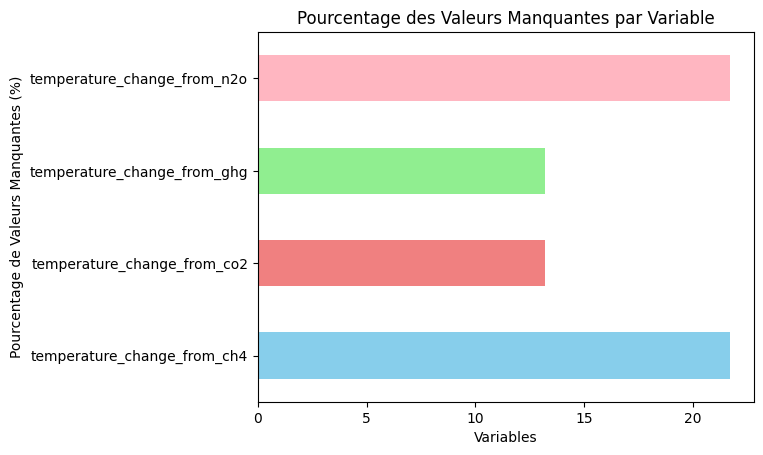

In [113]:
temp_columns = [column for column in columns_numerics if column.startswith('temperature')]
df = valeurs_manquantes(data[temp_columns], False)
df["Variables"] = temp_columns
plot_histogram(df)

<Figure size 640x480 with 0 Axes>

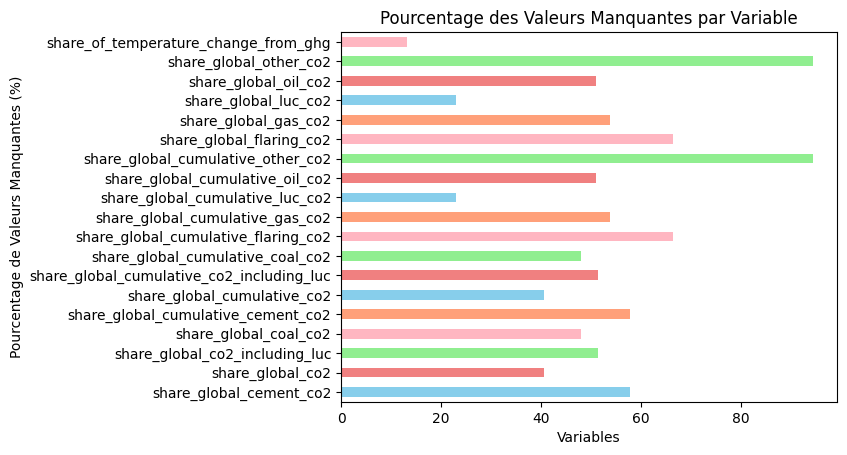

In [114]:
share_columns = [column for column in columns_numerics if column.startswith('share')]
df = valeurs_manquantes(data[share_columns], False)
df["Variables"] = share_columns
plot_histogram(df)

<Figure size 640x480 with 0 Axes>

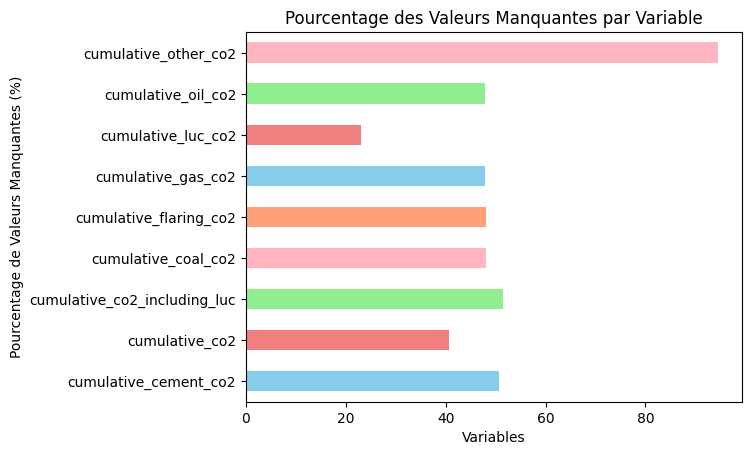

In [115]:
cumulative_columns = [column for column in columns_numerics if column.startswith('cumulative')]
df = valeurs_manquantes(data[cumulative_columns], False)
df["Variables"] = cumulative_columns
plot_histogram(df)

(48058, 47)


<Figure size 640x480 with 0 Axes>

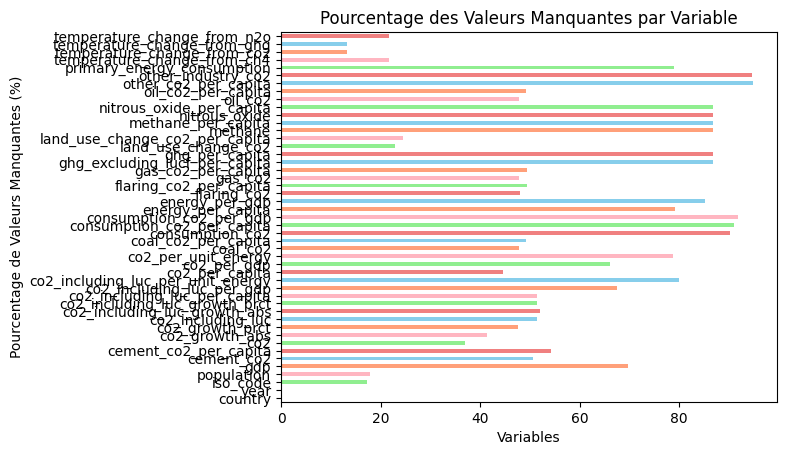

In [116]:
total_and_trade_columns = [column for column in columns_numerics if column.startswith('total') or column.startswith("trade")]
df = data.drop(columns=share_columns + cumulative_columns + total_and_trade_columns)
print(df.shape)
variables = df.columns.tolist()
df = valeurs_manquantes(df, False)
df["Variables"] = variables
plot_histogram(df)

<Figure size 640x480 with 0 Axes>

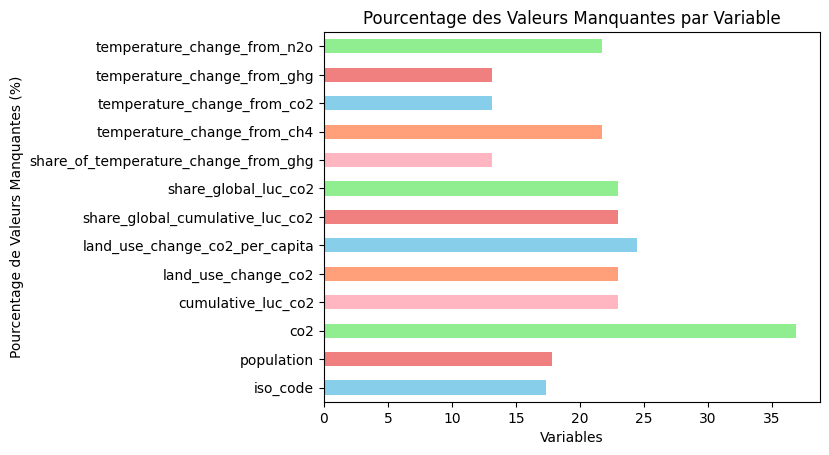

(13, 2)


In [117]:
donnees_manquantes["Variables"] = columns_missed
plot_histogram(donnees_manquantes[donnees_manquantes["% Pourcentages"] < 40])
print(donnees_manquantes[donnees_manquantes["% Pourcentages"] < 40].shape)

In [118]:
columns_50_missed = donnees_manquantes[donnees_manquantes["% Pourcentages"] > 30].index.to_list()
len(columns_50_missed)

65

<Figure size 640x480 with 0 Axes>

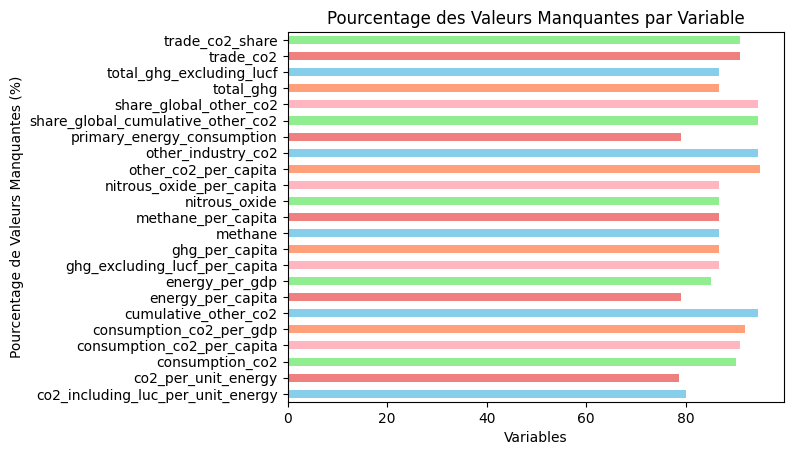

In [119]:
plot_histogram(donnees_manquantes[donnees_manquantes["% Pourcentages"] >= 70])

<Figure size 640x480 with 0 Axes>

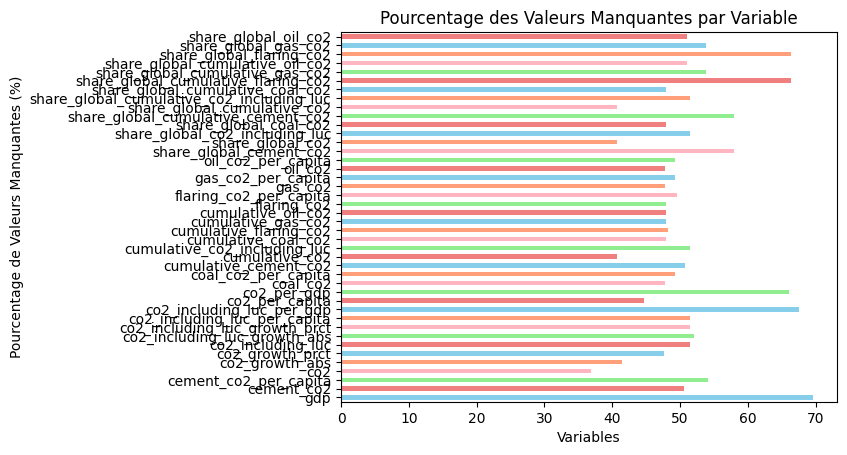

In [120]:
df = donnees_manquantes[donnees_manquantes["% Pourcentages"] < 70]
df = df[df["% Pourcentages"] >= 30]
plot_histogram(df)

In [121]:
print("Il y a {} features qui contiennent des valeurs manquantes.".format(donnees_manquantes.shape[0]))

Il y a 77 features qui contiennent des valeurs manquantes.


On peut noter que toutes les variables qui contiennent des valeurs manquantes sont de type numériques.

# Prétraitement

## Traitement des donnnées manquantes

<Figure size 640x480 with 0 Axes>

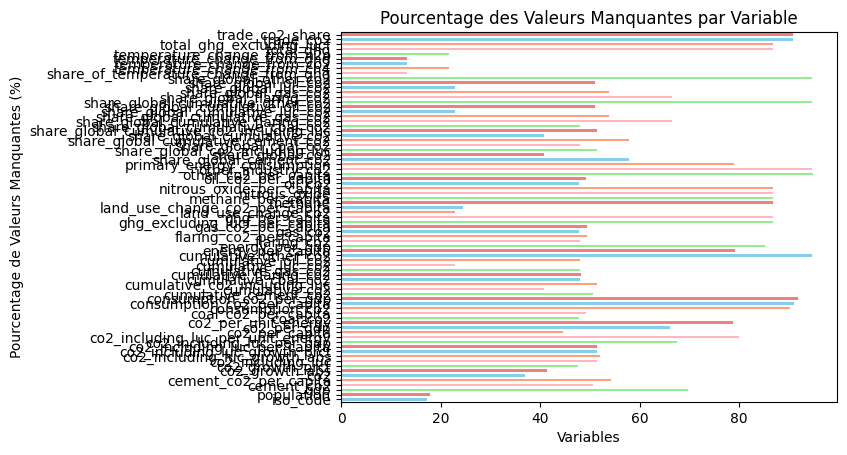

In [122]:
donnees_manquantes = valeurs_manquantes(data)
columns_missed = donnees_manquantes.index.to_list()
donnees_manquantes['Variables'] = columns_missed
plot_histogram(donnees_manquantes)

Nous commençons par éliminer les valeurs manquantes et les doublons de la colonne cible co2.

In [123]:
data = data.dropna(subset=["co2"])
data = data.drop_duplicates()
data.shape

(30308, 79)

Eliminer les colonnes de plus de 60% de valeurs manquantes.

In [124]:
missing_values = valeurs_manquantes(data)
missed_columns = missing_values[missing_values["% Pourcentages"] > 60].index.to_list()
data_cleared = data.drop(columns=missed_columns)
data_cleared = data_cleared.drop_duplicates()
data_cleared.shape

(30308, 56)

In [125]:
# Calculer le coefficient d'asymétrie (skewness) pour chaque colonne
data_cleared_numerics = data_cleared.drop(columns=['country', 'iso_code', 'co2'])
data_cleared_numerics.shape

(30308, 53)

In [126]:
means_imputations_columns = []
hight_outlier_columns = []

# Afficher la distribution de chaque colonne
for i, column in enumerate(data_cleared_numerics.columns):
    # Filtrer les valeurs aberrantes
    serie = data_cleared_numerics[column].dropna()
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    serie_filtre = serie[(serie >= Q1 - 1.5 * IQR) & (serie <= Q3 + 1.5 * IQR)]
    
    # Filtrer les colonnes avec des valeurs proches de zéro pour skewness et de trois pour kurtosis pour trouver
    # pour trouver les colonnes relativement symétriques.
    if (abs(serie_filtre.skew()) < 0.5) & (abs(serie_filtre.kurtosis()) - 3 < 0.5):
        means_imputations_columns.append((column, serie_filtre.mean()))
    elif (1 - (serie_filtre.shape[0] / serie.shape[0])) * 100 > 15:
        hight_outlier_columns.append(column)
means_imputations_columns

[('co2_growth_prct', 4.1566489021043),
 ('co2_including_luc_growth_prct', 0.7632530763994345),
 ('cumulative_flaring_co2', 0.0),
 ('flaring_co2', 0.0),
 ('flaring_co2_per_capita', 0.0),
 ('temperature_change_from_n2o', 0.0)]

In [127]:
for column, _mean in means_imputations_columns:
    data_cleared[column] = data_cleared[column].fillna(_mean)

In [128]:
columns_means_imputed = [column for column, _ in means_imputations_columns]
data_cleared[columns_means_imputed].isnull().sum()

co2_growth_prct                  0
co2_including_luc_growth_prct    0
cumulative_flaring_co2           0
flaring_co2                      0
flaring_co2_per_capita           0
temperature_change_from_n2o      0
dtype: int64

#### Traitement des valeurs manquantes dans des colonnes asymétriques avec des valeurs aberrantes élevées.

In [129]:
print(data_cleared.shape, data_cleared_numerics.shape)

(30308, 56) (30308, 53)


In [130]:
# from sklearn.impute import KNNImputer

# imputer = KNNImputer(n_neighbors=2)

# # Application de l'imputation par k-nnn.
# X_imputed = imputer.fit_transform(data_cleared_numerics[hight_outlier_columns])
# X_imputed = pd.DataFrame(X_imputed, columns=data_cleared_numerics[hight_outlier_columns].columns)
# X_imputed.to_csv('X_imputed_knn.csv', index=False)
# X_imputed.isnull().sum()

In [131]:
X_imputed = pd.read_csv('X_imputed_knn.csv', header=0)
X_imputed

population  cement_co2  co2_growth_abs  co2_including_luc  \
0       7356890.0       0.000           0.000              6.268   
1       7480464.0       0.000           0.070              7.370   
2       7571542.0       0.000           0.007              8.232   
3       7667534.0       0.000           0.000              9.183   
4       7764549.0       0.000           0.015             10.256   
...           ...         ...             ...                ...   
30303  15052191.0       0.558           1.419             19.423   
30304  15354606.0       0.473          -0.939             17.854   
30305  15669663.0       0.496          -1.926             15.459   
30306  15993525.0       0.531           0.547             15.513   
30307  16320539.0       0.531           0.460             15.580   

       co2_including_luc_growth_abs  coal_co2  cumulative_cement_co2  \
0                            5.6405     0.015                  0.000   
1                            1.1020     0.021                  0.000   
2                            0.8610     0.026                  0.000   
3                            0.9510     0.032                  0.000   
4                            1.0730     0.038                  0.000   
...                             ...       ...                    ...   
30303                        0.5340     6.097                 19.037   
30304                       -1.5690     5.571                 19.509   
30305                       -2.3960     4.309                 20.005   
30306                        0.0540     4.548                 20.536   
30307                        0.0670     5.027                 21.067   

       cumulative_co2  cumulative_co2_including_luc  cumulative_coal_co2  ...  \
0               0.015                         6.268                0.015  ...   
1               0.099                        13.638                0.036  ...   
2               0.191                        21.870                0.061  ...   
3               0.282                        31.053                0.093  ...   
4               0.388                        41.309                0.131  ...   
...               ...                           ...                  ...  ...   
30303         763.817                      2978.304              604.321  ...   
30304         773.593                      2996.158              609.893  ...   
30305         781.442                      3011.616              614.202  ...   
30306         789.838                      3027.130              618.750  ...   
30307         798.694                      3042.710              623.777  ...   

       share_global_cumulative_gas_co2  share_global_cumulative_luc_co2  \
0                                  0.0                            0.127   
1                                  0.0                            0.127   
2                                  0.0                            0.127   
3                                  0.0                            0.127   
4                                  0.0                            0.128   
...                                ...                              ...   
30303                              0.0                            0.289   
30304                              0.0                            0.289   
30305                              0.0                            0.288   
30306                              0.0                            0.287   
30307                              0.0                            0.287   

       share_global_cumulative_oil_co2  share_global_flaring_co2  \
0                                0.000                       0.0   
1                                0.000                       0.0   
2                                0.000                       0.0   
3                                0.001                       0.0   
4                                0.001                       0.0   
...                                ...     

In [132]:
columns_imputed = means_imputations_columns + hight_outlier_columns
other_columns = [column for column in data_cleared_numerics.columns if column not in columns_imputed]
print("Il reste {} colonnes à imputer par itération".format(len(other_columns)))

Il reste 17 colonnes à imputer par itération


#### Imputation des colonnes restantes par la méthode itérative comme vue dans la section visualisation.

In [133]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()

# Inputation par la méthode itérative.
result = imputer.fit_transform(data_cleared_numerics[other_columns])
data_iterative_imputed = pd.DataFrame(result, columns = other_columns)
data_iterative_imputed.isnull().sum()

year                              0
gdp                               0
cement_co2_per_capita             0
co2_growth_prct                   0
co2_including_luc_growth_prct     0
co2_including_luc_per_capita      0
co2_including_luc_per_gdp         0
co2_per_capita                    0
co2_per_gdp                       0
coal_co2_per_capita               0
cumulative_flaring_co2            0
flaring_co2                       0
flaring_co2_per_capita            0
land_use_change_co2_per_capita    0
oil_co2_per_capita                0
temperature_change_from_ghg       0
temperature_change_from_n2o       0
dtype: int64

In [134]:
len(X_imputed.columns.tolist() + other_columns), len(data_cleared_numerics.columns.tolist())

(53, 53)

In [135]:
X_imputed_columns = X_imputed.columns.tolist()
data_cleared_numerics[X_imputed_columns] = X_imputed.to_numpy()
data_cleared_numerics[other_columns] = data_iterative_imputed.to_numpy()

data_cleared[X_imputed_columns + other_columns] = data_cleared_numerics[X_imputed_columns + other_columns].to_numpy()
data_cleared.shape

(30308, 56)

In [136]:
data_cleared

country    year iso_code  population           gdp  cement_co2  \
99     Afghanistan  1949.0      AFG   7356890.0  2.874382e+11       0.000   
100    Afghanistan  1950.0      AFG   7480464.0  9.421400e+09       0.000   
101    Afghanistan  1951.0      AFG   7571542.0  9.692280e+09       0.000   
102    Afghanistan  1952.0      AFG   7667534.0  1.001733e+10       0.000   
103    Afghanistan  1953.0      AFG   7764549.0  1.063052e+10       0.000   
...            ...     ...      ...         ...           ...         ...   
48053     Zimbabwe  2018.0      ZWE  15052191.0  2.271535e+10       0.558   
48054     Zimbabwe  2019.0      ZWE  15354606.0  2.874382e+11       0.473   
48055     Zimbabwe  2020.0      ZWE  15669663.0  2.874382e+11       0.496   
48056     Zimbabwe  2021.0      ZWE  15993525.0  2.874382e+11       0.531   
48057     Zimbabwe  2022.0      ZWE  16320539.0  2.874382e+11       0.531   

       cement_co2_per_capita     co2  co2_growth_abs  co2_growth_prct  ...  \
99                     0.000   0.015           0.000         5.019109  ...   
100                    0.000   0.084           0.070       475.000000  ...   
101                    0.000   0.092           0.007         8.696000  ...   
102                    0.000   0.092           0.000         0.000000  ...   
103                    0.000   0.106           0.015        16.000000  ...   
...                      ...     ...             ...              ...  ...   
48053                  0.037  10.715           1.419        15.265000  ...   
48054                  0.031   9.775          -0.939        -8.765000  ...   
48055                  0.032   7.850          -1.926       -19.700000  ...   
48056                  0.033   8.396           0.547         6.962000  ...   
48057                  0.033   8.856           0.460         5.477000  ...   

       share_global_cumulative_oil_co2  share_global_flaring_co2  \
99                               0.000                       0.0   
100                              0.000                       0.0   
101                              0.000                       0.0   
102                              0.001                       0.0   
103                              0.001                       0.0   
...                                ...                       ...   
48053                            0.025                       0.0   
48054                            0.025                       0.0   
48055                            0.025                       0.0   
48056                            0.025                       0.0   
48057                            0.025                       0.0   

       share_global_gas_co2  share_global_luc_co2  share_global_oil_co2  \
99                      0.0                 0.118                 0.000   
100                     0.0                 0.120                 0.004   
101                     0.0                 0.132                 0.004   
102                     0.0                 0.144                 0.003   
103                     0.0                 0.158                 0.003   
...                     ...                   ...                   ...   
48053                   0.0                 0.203                 0.033   
48054                   0.0                 0.176                 0.030   
48055                   0.0                 0.177                 0.028   
48056                   0.0                 0.165                 0.029   
48057                   0.0                 0.156                 0.028   

       share_of_temperature_change_from_ghg  temperature_change_from_ch4  \
99                                    0.129                        0.000   
100                                   0.129                        0.000   
101                                   0.129                        0.000   
102                                   0.129                        0.000   
103                                   0.129        

In [137]:
valeurs_manquantes = data_cleared.isnull().sum()
valeurs_manquantes[valeurs_manquantes > 0]   

iso_code    6443
dtype: int64

In [138]:
import pycountry

def get_country_code(country_name, iso_code):
    try:
        country = pycountry.countries.lookup(country_name)
        return country.alpha_2
    except LookupError:
        return iso_code

data_cleared['iso_code'] = data_cleared.apply(lambda row: get_country_code(row['country'], row['iso_code']) if pd.isnull(row['iso_code']) else row['iso_code'], axis=1)
valeurs_manquantes = data_cleared.isnull().sum()
valeurs_manquantes[valeurs_manquantes > 0]  

iso_code    6443
dtype: int64

In [139]:
data_cleared["iso_code"] = data_cleared["iso_code"].fillna(data_cleared["iso_code"].mode()[0])
valeurs_manquantes = data_cleared.isnull().sum()
valeurs_manquantes[valeurs_manquantes > 0]  

Series([], dtype: int64)

In [105]:
data_cleared

country    year iso_code  population           gdp  cement_co2  \
99     Afghanistan  1949.0      AFG   7356890.0  2.874382e+11       0.000   
100    Afghanistan  1950.0      AFG   7480464.0  9.421400e+09       0.000   
101    Afghanistan  1951.0      AFG   7571542.0  9.692280e+09       0.000   
102    Afghanistan  1952.0      AFG   7667534.0  1.001733e+10       0.000   
103    Afghanistan  1953.0      AFG   7764549.0  1.063052e+10       0.000   
...            ...     ...      ...         ...           ...         ...   
48053     Zimbabwe  2018.0      ZWE  15052191.0  2.271535e+10       0.558   
48054     Zimbabwe  2019.0      ZWE  15354606.0  2.874382e+11       0.473   
48055     Zimbabwe  2020.0      ZWE  15669663.0  2.874382e+11       0.496   
48056     Zimbabwe  2021.0      ZWE  15993525.0  2.874382e+11       0.531   
48057     Zimbabwe  2022.0      ZWE  16320539.0  2.874382e+11       0.531   

       cement_co2_per_capita     co2  co2_growth_abs  co2_growth_prct  ...  \
99                     0.000   0.015           0.000         5.019109  ...   
100                    0.000   0.084           0.070       475.000000  ...   
101                    0.000   0.092           0.007         8.696000  ...   
102                    0.000   0.092           0.000         0.000000  ...   
103                    0.000   0.106           0.015        16.000000  ...   
...                      ...     ...             ...              ...  ...   
48053                  0.037  10.715           1.419        15.265000  ...   
48054                  0.031   9.775          -0.939        -8.765000  ...   
48055                  0.032   7.850          -1.926       -19.700000  ...   
48056                  0.033   8.396           0.547         6.962000  ...   
48057                  0.033   8.856           0.460         5.477000  ...   

       share_global_cumulative_oil_co2  share_global_flaring_co2  \
99                               0.000                       0.0   
100                              0.000                       0.0   
101                              0.000                       0.0   
102                              0.001                       0.0   
103                              0.001                       0.0   
...                                ...                       ...   
48053                            0.025                       0.0   
48054                            0.025                       0.0   
48055                            0.025                       0.0   
48056                            0.025                       0.0   
48057                            0.025                       0.0   

       share_global_gas_co2  share_global_luc_co2  share_global_oil_co2  \
99                      0.0                 0.118                 0.000   
100                     0.0                 0.120                 0.004   
101                     0.0                 0.132                 0.004   
102                     0.0                 0.144                 0.003   
103                     0.0                 0.158                 0.003   
...                     ...                   ...                   ...   
48053                   0.0                 0.203                 0.033   
48054                   0.0                 0.176                 0.030   
48055                   0.0                 0.177                 0.028   
48056                   0.0                 0.165                 0.029   
48057                   0.0                 0.156                 0.028   

       share_of_temperature_change_from_ghg  temperature_change_from_ch4  \
99                                    0.129                        0.000   
100                                   0.129                        0.000   
101                                   0.129                        0.000   
102                                   0.129                        0.000   
103                                   0.129        

# Brouillons

**Visualisation des boxplots des attributs ayant des valeurs manquantes.**

In [113]:
attributes_m = columns_missed 

# Correction de la configuration du sous-graphe en fonction du nombre réel d'attributs avec des valeurs manquantes
n_rows, n_cols = (3, 3) if len(columns_missed) > 4 else (2, 4) 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
fig.suptitle('Boxplots for Selected Attributes')
axes = axes.flatten()

# Générer un boxplot pour chaque attribut avec les valeurs manquantes.
for i, attr in enumerate(columns_missed):
    sns.boxplot(ax=axes[i], x=data[attr]) 
    axes[i].set_title(f'Boxplot of {attr}')
    axes[i].set_xlabel('')

# Cacher les boxplots vides.
for j in range(i + 1, n_rows * n_cols):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

IndexError: index 9 is out of bounds for axis 0 with size 9

**Analyse :**
- ***Remarque :*** Puisque nous ne saurons pas expliquer la présence des valeurs aberrantes dans notre base de données (erreur de mesure, erreur de saisie ou si elles représentent des variations réelles mais rares), nous allons les conserver telles qu'elles sont. 
- Cependant, les attributs "ASA+", "ASA-", "a_heavy" et "a_IC" présentent un nombre assez important de valeurs aberrantes, et nous nous intéressons à l'imputation des valeurs manquantes de ces attributs. Il est donc important de choisir une méthode d'imputation qui peut conduire à une distorsion de la distribution réelle des données, et par la suite affecter la modélisation des données. Pour ces attributs, nous allons écarter l'imputation par moyenne parce qu'elle est influencée directement par les valeurs extrêmes et considérer plutôt autres méthodes.
- Nous remarquons que pour les attributs "vsurf_S" et "vsurf_V", les distributions sont très asymétriques. Pour cela, nous allons calculer le coefficient d'asymétrie afin de mieux décider du modèle pour l'imputation.
- Pour l'attribut "vsurf_R", nous allons le traiter à part, parce que son box plot est une ligne définie sur 0 et il présente une valeur aberrante de -1.


**Attributs avec valeurs aberrantes**

Nous avons donc décidé d'utiliser l'imputation par la médiane pour gérer les valeurs manquantes dans les attributs "ASA+", "ASA-", "a_heavy", et "a_IC" en raison de son efficacité à préserver la distribution centrale des données tout en étant robuste aux valeurs aberrantes, ce qui est essentiel étant donné la présence de distributions asymétriques et le faible pourcentage de valeurs manquantes dans ces attributs (<5%). Pour les attributs ayant des pourcentages de valeurs manquantes supérieurs à 5% (16%, 30% et 41%), nous allons utiliser une méthode itérative basée sur le prédicteur Random Forest pour évaluer les valeurs manquantes présentes.

In [ ]:
# Création d'une copie de 'data' pour effectuer l'imputation
_data = data.copy()

# Imputation par la médiane pour "ASA+", "ASA-", "a_heavy", et "a_IC"
median_imputer = SimpleImputer(strategy='median')
columns_to_impute_median = ["ASA+", "ASA-", "a_heavy", "a_IC"]
_data[columns_to_impute_median] = median_imputer.fit_transform(_data[columns_to_impute_median])

# Configuration de l'IterativeImputer pour utiliser un RandomForestRegressor
random_forest_imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=100, random_state=0),
                        random_state=0, max_iter=10, initial_strategy='median')

# Colonnes à imputer de manière itérative
columns_to_impute_iteratively = ["vsurf_S", "vsurf_V", "vsurf_R"]
_data[columns_to_impute_iteratively] = random_forest_imputer.fit_transform(_data[columns_to_impute_iteratively])

Nous allons vérifier que le remplacement des valeurs manquantes sont bien remplis.

In [ ]:
_data[columns_missed].isnull().sum()

ASA+       0
ASA-       0
a_heavy    0
a_IC       0
vsurf_R    0
vsurf_S    0
vsurf_V    0
dtype: int64

Nous allons normaliser les données pour la suite du prétraitement.

In [ ]:
# Standardisation des données
columns_numerics_scaled = columns_numerics
scaler = StandardScaler()
_data[columns_numerics] = scaler.fit_transform(_data[columns_numerics])

In [ ]:
_data[columns_numerics].describe()

apol          ASA+          ASA-       a_count    a_donacc  \
count  1.540000e+02  1.540000e+02  1.540000e+02  1.540000e+02  154.000000   
mean  -1.038131e-16 -3.460435e-17  7.497610e-16 -1.845566e-16    0.000000   
std    1.003263e+00  1.003263e+00  1.003263e+00  1.003263e+00    1.003263   
min   -2.943695e+00 -1.568500e+00 -2.146112e+00 -2.440617e+00   -0.339848   
25%   -5.185235e-01 -5.390599e-01 -2.646954e-01 -3.912440e-01   -0.339848   
50%    1.633450e-01 -1.137837e-01  2.658429e-01 -3.912440e-01   -0.339848   
75%    6.390817e-01  5.268801e-01  6.077591e-01  3.772710e-01   -0.339848   
max    3.002489e+00  4.063643e+00  2.377555e+00  3.912440e+00    4.312290   

            a_heavy         a_hyd          a_IC          a_nC       a_nCl  \
count  1.540000e+02  1.540000e+02  1.540000e+02  1.540000e+02  154.000000   
mean   1.946495e-16 -2.278120e-16 -4.613914e-16 -1.499522e-16    0.000000   
std    1.003263e+00  1.003263e+00  1.003263e+00  1.003263e+00    1.003263   
min   -1.595228e+00 -2.264530e+00 -2.268644e+00 -2.292651e+00   -1.056366   
25%   -3.363293e-01 -2.694635e-01 -3.477681e-01  1.423025e-01   -1.056366   
50%   -1.564865e-01 -6.995687e-02 -2.103186e-01  1.423025e-01    0.302134   
75%    2.335620e-02  1.295498e-01  3.257325e-01  1.423025e-01    0.981384   
max    4.339582e+00  4.518696e+00  5.430594e+00  3.388908e+00    2.339884   

       ...           VSA       vsa_acc       vsa_hyd       vsa_pol  \
count  ...  1.540000e+02  1.540000e+02  1.540000e+02  1.540000e+02   
mean   ...  1.614870e-16  6.920871e-17  1.614870e-16  4.613914e-17   
std    ...  1.003263e+00  1.003263e+00  1.003263e+00  1.003263e+00   
min    ... -2.531837e+00 -5.504057e-01 -2.884983e+00 -6.025494e-01   
25%    ... -5.155682e-01 -5.504057e-01 -6.135648e-01 -6.025494e-01   
50%    ...  1.492682e-01 -5.504057e-01  2.348124e-01 -6.025494e-01   
75%    ...  4.218788e-01  3.741633e-01  5.411241e-01  2.970818e-01   
max    ...  3.018561e+00  3.480619e+00  3.947409e+00  3.319749e+00   

            vsurf_A       vsurf_R       vsurf_S       vsurf_V        Weight  \
count  1.540000e+02  1.540000e+02  1.540000e+02  1.540000e+02  1.540000e+02   
mean   1.153478e-16 -5.767392e-18  1.153478e-17 -2.883696e-17  2.133935e-16   
std    1.003263e+00  1.003263e+00  1.003263e+00  1.003263e+00  1.003263e+00   
min   -9.004476e-01 -1.078289e+01 -1.950235e+00 -2.000620e+00 -1.747920e+00   
25%   -8.576862e-01  1.103471e-01 -8.907522e-01 -8.809608e-01 -5.117692e-01   
50%   -7.619514e-01  1.103471e-01  7.582039e-01  7.563563e-01  8.066352e-03   
75%    9.154653e-01  1.103471e-01  8.609232e-01  8.585363e-01  3.811045e-01   
max    1.920736e+00  1.103471e-01  9.042666e-01  9.025402e-01  4.522683e+00   

             zagreb  
count  1.540000e+02  
mean   6.632501e-17  
std    1.003263e+00  
min   -1.658273e+00  
25%   -3.999776e-01  
50%   -2.202211e-01  
75%    1.392918e-01  
max    4.333609e+00  

[8 rows x 74 columns]

Nous allons formater la variable **Class** en supprimant le mot "Class" pour avoir une valeur numérique.

In [ ]:
_data["Class"] = _data["Class"].str.replace("Class", "").astype(int)
_data["Class"].unique()

array([ 2, -2,  1, -1,  0])

Nous remarquons nous avons les classes -2, -1, 0, 1 et 2.

#### Visualisation et explotation de la matrice de corrélation.

In [ ]:
def plot_corr(corr_data):
    fig = px.imshow(corr_data, 
                x=corr_data.columns, 
                y=corr_data.index)
    
    fig.update_layout(title="Matrice de corrélation", 
                    xaxis_title="Features", 
                    yaxis_title="Features",
                    width=950, height=700)
    
    fig.show()

In [ ]:
corr_data = _data[columns_numerics].corr()
plot_corr(corr_data)

In [ ]:
correled_data = corr_data.where(corr_data.abs() >= 0.8)
index_data = correled_data.index.to_list()
columns_to_drop = set()
combine_possible = set()
for i in range(correled_data.shape[0]):
    for j in range(correled_data.shape[0]):
        if i < j and pd.notna(correled_data.iloc[i, j]) and (index_data[i], index_data[j]) not in combine_possible and (index_data[j], index_data[i]) not in combine_possible:
            combine_possible.add((index_data[i], index_data[j]))
            corr_data_i = _data[["Class", index_data[i], index_data[j]]].corr()
            if corr_data_i["Class"][index_data[i]] > corr_data_i["Class"][index_data[j]]:
                columns_to_drop.add(index_data[i])
            else:
                columns_to_drop.add(index_data[j])

print(len(columns_to_drop), columns_to_drop)

58 {'pmi2', 'VSA', 'dens', 'chi0v_C', 'TPSA', 'VAdjEq', 'vdw_vol', 'ASA+', 'vdw_area', 'radius', 'h_logS', 'vol', 'vsa_pol', 'chi0', 'logS', 'SMR', 'pmi', 'bpol', 'PEOE_VSA_NEG', 'a_nF', 'a_nH', 'balabanJ', 'density', 'DCASA', 'chi1_C', 'vsa_acc', 'chi1v', 'h_logP', 'a_hyd', 'rgyr', 'apol', 'diameter', 'VDistEq', 'dipole', 'ASA-', 'DASA', 'CASA-', 'chi0v', 'PEOE_VSA_PNEG', 'petitjeanSC', 'logP(o/w)', 'a_count', 'pmi3', 'Weight', 'PC+', 'zagreb', 'chi0_C', 'PEOE_VSA_PPOS', 'mr', 'std_dim1', 'chi1', 'VDistMa', 'vsurf_A', 'PEOE_VSA_POL', 'vsa_hyd', 'vsurf_S', 'chi1v_C', 'a_heavy'}


In [ ]:
filtered_data = _data.drop(columns=columns_to_drop)
filtered_data

SMILES  Class  a_donacc  \
0    FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F...      2 -0.339848   
1                                     c12c(cccc1)cccc2      2 -0.339848   
2    Clc1c(Cl)c(Cl)c(c(Cl)c1Cl)-c1c(Cl)c(Cl)c(Cl)c(...     -2 -0.339848   
3    ClC1(Cl)C2(Cl)C(Cl)=C(Cl)C1(Cl)C1C2C(Cl)C2(Cl)...     -2  0.823187   
4    Clc1c(Cl)c(Cl)c(c(Cl)c1Cl)-c1c(Cl)c(Cl)c(Cl)c(...     -2 -0.339848   
..                                                 ...    ...       ...   
149                Clc1c(Cl)cc(-c2c(Cl)cc(Cl)cc2)cc1Cl     -1 -0.339848   
150      Clc1c(Cl)c(-c2c(Cl)cc(Cl)c(Cl)c2)cc(Cl)c1[O-]      0 -0.339848   
151                             c12c3c(ccc1cccc2)cccc3      0 -0.339848   
152                Clc1c(Cl)cc2c(oc3c2cc(Cl)c(Cl)c3)c1      0 -0.339848   
153                           c12c3c4ccc1cccc2ccc3ccc4      0 -0.339848   

         a_IC      a_nC     a_nCl     CASA+      npr2       PC-  petitjean  \
0    1.631192  0.953954 -1.056366 -0.035061  1.301597 -3.490111   0.486990   
1   -1.663706 -0.669349 -1.056366 -0.157575 -1.200113  0.674675  -0.673579   
2   -1.246284  0.142302  2.339884 -0.731372 -1.034279  0.431942   0.100134   
3    0.510090 -0.669349  1.660634 -0.531655  0.748305  0.172175  -1.834148   
4   -0.760421  0.142302  2.000259 -0.589092  0.910144  0.443440   0.100134   
..        ...       ...       ...       ...       ...       ...        ...   
149 -0.210319  0.142302  0.641759 -0.204297  0.415848  0.489431   0.100134   
150  0.095770  0.142302  0.981384 -0.517393  0.786203  0.115963   0.100134   
151 -1.075538  0.953954 -1.056366  0.207211 -0.944847  0.546920  -0.176192   
152 -0.070416  0.142302  0.302134 -0.257391  0.103906  0.509446  -1.108792   
153 -0.922702  1.765605 -1.056366  0.239616 -1.845566  0.546920  -0.176192   

         RPC-    rsynth     SlogP  std_dim2  std_dim3    VAdjMa   vsurf_R  \
0   -0.858976  0.948476  0.587676 -1.691880  0.524791  3.263750  0.110347   
1   -0.312369  2.245063 -1.523414  0.381468 -1.530402 -2.332145  0.110347   
2   -0.629922 -0.689319  2.121143  1.262621 -0.175574  0.748618  0.110347   
3   -0.320374 -0.380437 -0.396403 -0.168948  1.142257  0.562954  0.110347   
4   -0.610246 -0.689319  1.783257 -0.573837  1.116294  0.562954  0.110347   
..        ...       ...       ...       ...       ...       ...       ...   
149 -0.525042 -0.689319  0.431713 -0.313519  0.417952 -0.275195  0.110347   
150  2.291768 -0.689319  0.843960 -0.683885  0.959161  0.164868  0.110347   
151 -0.629922  2.245063 -0.927071  1.203752 -1.523148 -0.767146  0.110347   
152  0.339534 -0.689319  0.214005  0.480861 -1.529800 -0.049370  0.110347   
153 -0.629922 -0.689319 -0.621454  2.142365 -1.529695 -0.049370  0.110347   

      vsurf_V  
0   -0.505787  
1    0.891534  
2    0.888383  
3   -1.039245  
4    0.853335  
..        ...  
149  0.833171  
150 -1.803000  
151  0.868830  
152  0.824638  
153  0.888246  

[154 rows x 18 columns]

In [ ]:
columns_numerics = [column for column in columns_numerics if column not in list(columns_to_drop) + columns_categoriels]
plot_corr(filtered_data[columns_numerics].corr())

Nous allons éliminer la colonne **SMILES**, car nous n'avons pas des explications claires sur la colonne pour pouvoir manipuler et prétraiter. Eliminer une seule colonne sur 75 colonnes, ne fait pas perdre d'information, que de risquer de faire un prétraitement qui pourrait ajouter un biais dans les données d'entraînement. 

In [ ]:
filtered_data = filtered_data.drop(columns=["SMILES"])
filtered_data.head(2)

Class  a_donacc      a_IC      a_nC     a_nCl     CASA+      npr2  \
0      2 -0.339848  1.631192  0.953954 -1.056366 -0.035061  1.301597   
1      2 -0.339848 -1.663706 -0.669349 -1.056366 -0.157575 -1.200113   

        PC-  petitjean      RPC-    rsynth     SlogP  std_dim2  std_dim3  \
0 -3.490111   0.486990 -0.858976  0.948476  0.587676 -1.691880  0.524791   
1  0.674675  -0.673579 -0.312369  2.245063 -1.523414  0.381468 -1.530402   

     VAdjMa   vsurf_R   vsurf_V  
0  3.263750  0.110347 -0.505787  
1 -2.332145  0.110347  0.891534

##### Recherche des 10 meilleurs attributs.

**Nous allons utiliser deux méthodes statistiques pour trouver les 10 meilleures attributs:**
- La méthode ***Analyse de Variance (ANOVA)*** pour calculer la p-value des attributs et une méthodes. 
    - Nous allons ensuite éliminer les attributs ayant une p-value> 0.08. En effet, pour chaque attribut numérique, on applique l'ANOVA en le comparant à la variable Class. Cela implique de regrouper les données en fonction de Class et de calculer la p-value pour chaque attribut pour tester si les moyennes entre les groupes sont significativement différentes. Si la p-value est supérieure à 0.08, cela signifie que ces attributs ne montrent pas de différences significatives entre les groupes de la variable Class et ne sont donc pas considérés comme "utiles" pour la prédire.
- La méthode ***select K best*** avec un ***Random Forest***.
    - Cette méthode est capable d'hiérarchiser les attributs de la plus importante à la moins importante, c'est qui permet de récuperer facilement les 10 attributs qui contiennent l'essentiel de l'information.

**La méthode Analyse de Variance (ANOVA)**

In [ ]:
p_values = {}

for column in columns_numerics:
    groups = [filtered_data[filtered_data['Class'] == classe][column] for classe in filtered_data['Class'].unique()]
    
    if all(len(group) > 1 for group in groups):
        f_stat, p_val = f_oneway(*groups)
        p_values[column] = p_val
    else:
        p_values[column] = np.nan  # Attribuer NaN si un groupe a moins de 2 observations
        
# Définir le seuil de p-value et éliminer les variables non significatives
seuil_p_value = 0.08
eliminated_features = [var for var, p_val in p_values.items() if p_val > seuil_p_value]
best_features_ANOVA = [column for column in columns_numerics if column not in eliminated_features]

print("les {} meilleures variables trouver par ANOVA: {}".format(len(best_features_ANOVA), best_features_ANOVA))

les 10 meilleures variables trouver par ANOVA: ['a_donacc', 'a_nC', 'a_nCl', 'CASA+', 'PC-', 'RPC-', 'rsynth', 'SlogP', 'VAdjMa', 'vsurf_V']


Remarque: la p-value est généralement contenue entre 0 et 1, mais parce que la base de données présente des outliers, certains attributs peuvent avoir des p-values supérieurs à 1.

**La méthode select 10 best avec un Random Forest**

In [ ]:
X, y = filtered_data.drop(columns=["Class"]), filtered_data["Class"]

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, y)

k_best_selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = k_best_selector.fit_transform(X, y)

selected_feature_indices = k_best_selector.get_support()

best_features_randomforest = [X.columns.to_list()[i] for i, selected in enumerate(selected_feature_indices) if selected]

print("les {} meilleures variables trouver par RandomForest: {}".format(len(best_features_randomforest), best_features_randomforest))

les 10 meilleures variables trouver par RandomForest: ['a_donacc', 'a_nC', 'a_nCl', 'CASA+', 'PC-', 'RPC-', 'rsynth', 'SlogP', 'VAdjMa', 'vsurf_V']


**Comparaison des 10 meilleures variables trouvées par les deux méthodes.**

In [ ]:
match = [rf_column == anova_column for rf_column, anova_column in zip(sorted(best_features_randomforest), sorted(best_features_ANOVA))]
print("Nous avons {}% de correspondance entre les attributs trouver par les deux méthodes.".format((sum(match) / len(match)) * 100))

Nous avons 100.0% de correspondance entre les attributs trouver par les deux méthodes.


Comme les attributs trouvés par les deux méthodes correspondes à 100% alors nous allons prendre les attributs d'un entre les deux.

In [ ]:
best_10_features = best_features_randomforest

In [ ]:
donnees_propres = _data[best_10_features + ["Class"]]
donnees_propres.head(3)

a_donacc      a_nC     a_nCl     CASA+       PC-      RPC-    rsynth  \
0 -0.339848  0.953954 -1.056366 -0.035061 -3.490111 -0.858976  0.948476   
1 -0.339848 -0.669349 -1.056366 -0.157575  0.674675 -0.312369  2.245063   
2 -0.339848  0.142302  2.339884 -0.731372  0.431942 -0.629922 -0.689319   

      SlogP    VAdjMa   vsurf_V  Class  
0  0.587676  3.263750 -0.505787      2  
1 -1.523414 -2.332145  0.891534      2  
2  2.121143  0.748618  0.888383     -2

Visualisation de la matrice de corrélation des 10 meilleures attributs obtenus.

In [ ]:
plot_corr(donnees_propres.drop(columns=["Class"]).corr())

Visualisation de la distribution des 10 meilleurs attributs 

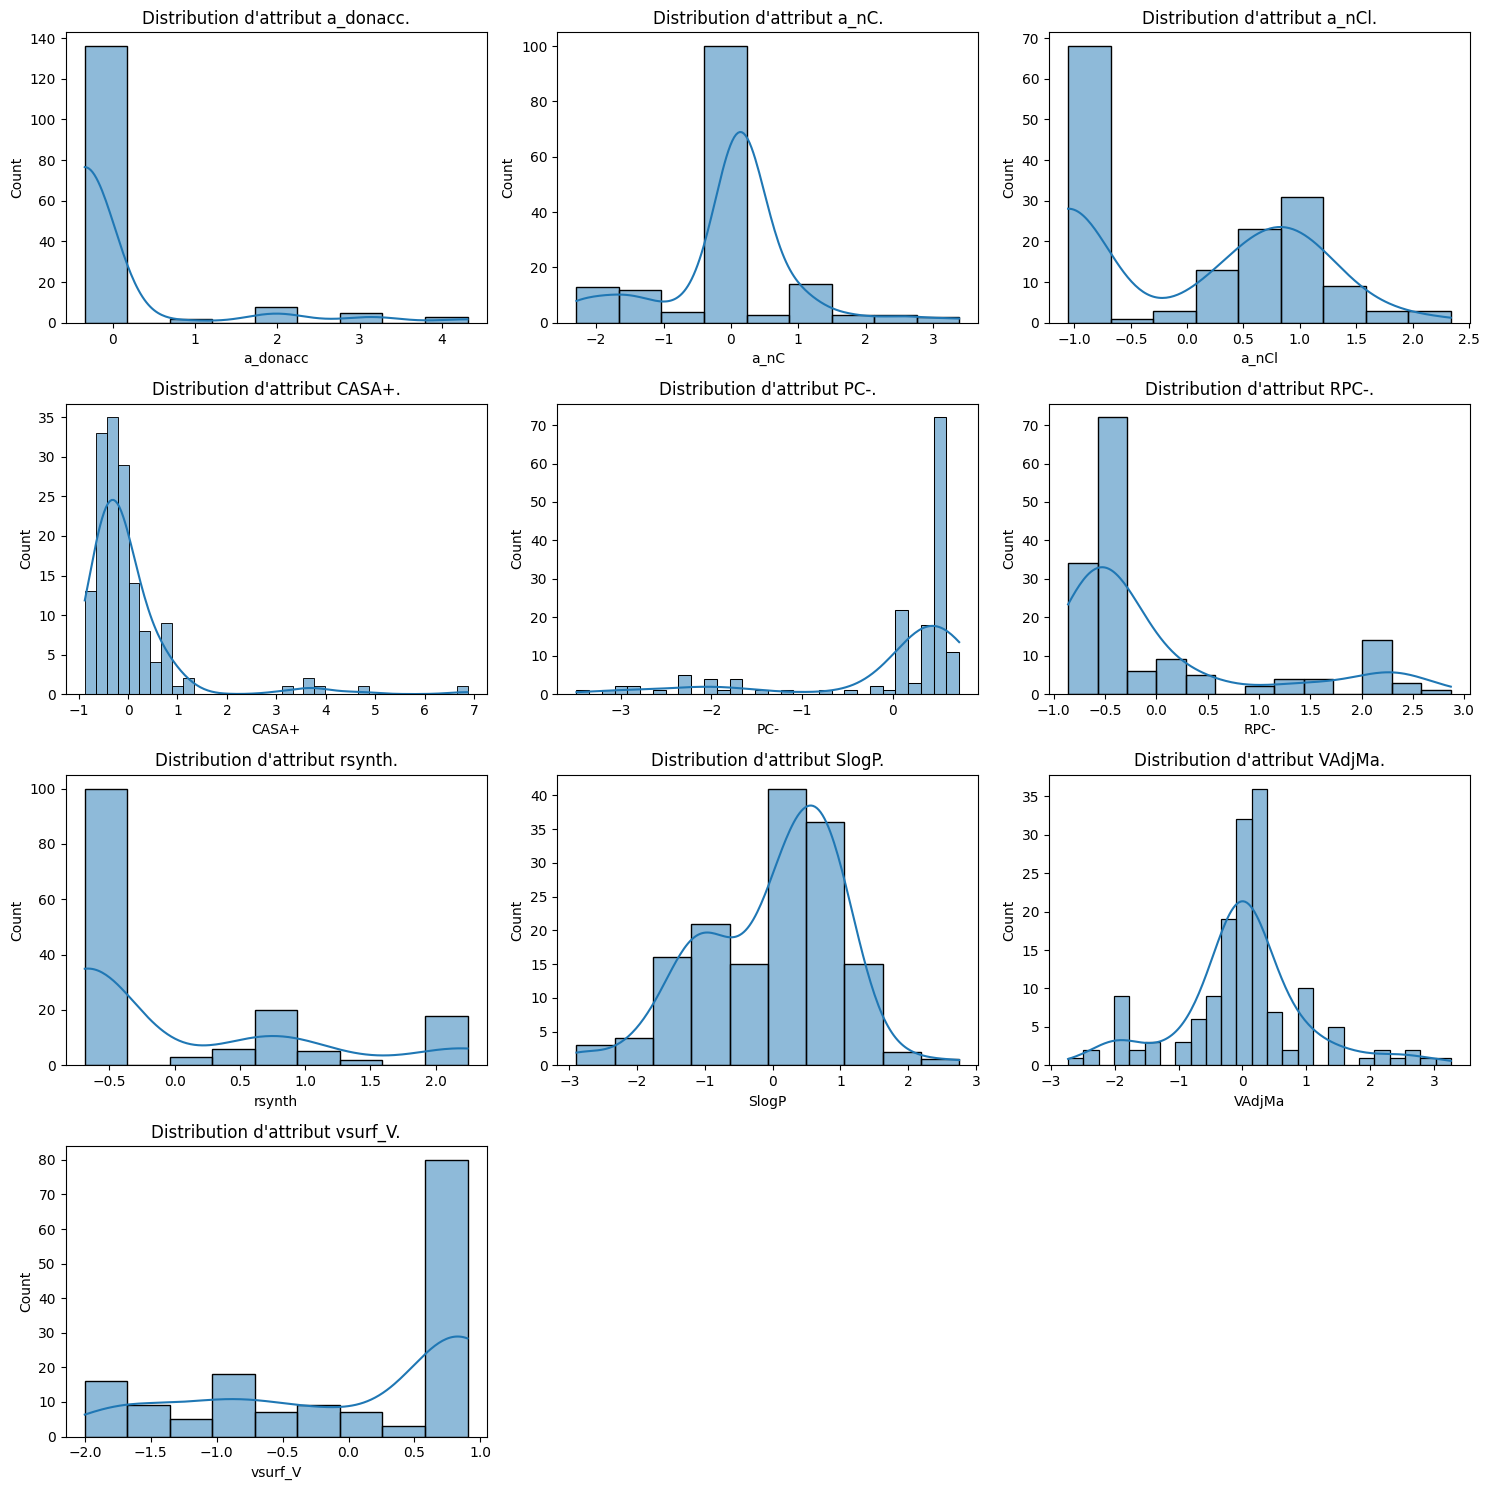

In [ ]:
plt.figure(figsize=(15, 15))

for i, attribut in enumerate(best_10_features, 1):
    plt.subplot(4, 3, i)  # Configuration pour 3 lignes et 3 colonnes
    sns.histplot(data=donnees_propres, x=attribut, kde=True)  # KDE pour la courbe de densité
    plt.title("Distribution d'attribut {}.".format(attribut))

plt.tight_layout()
plt.show()

**Visualisation avec des boîtes à moustache.**

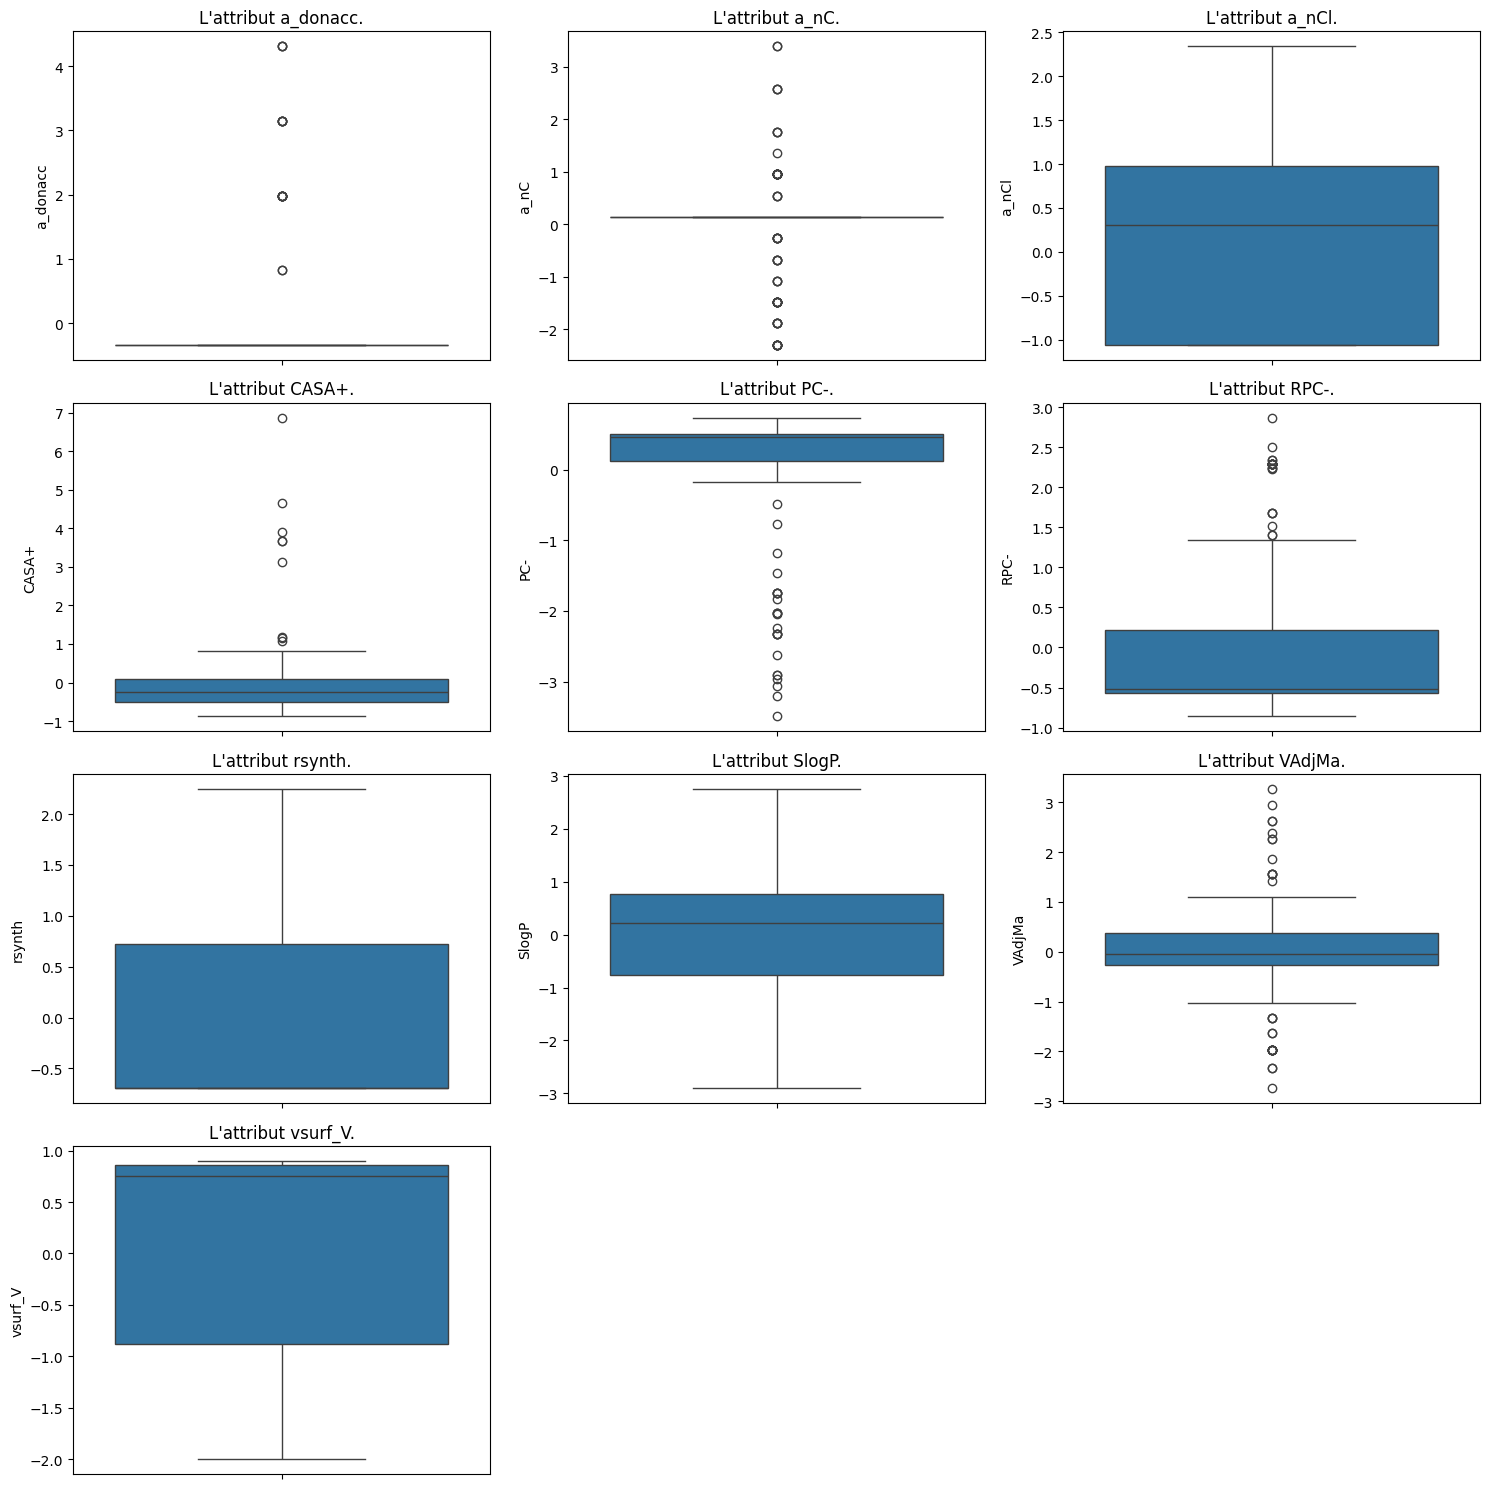

In [ ]:
plt.figure(figsize=(15, 15))

for i, attribut in enumerate(best_10_features, 1):
    plt.subplot(4, 3, i) 
    sns.boxplot(data=donnees_propres, y=attribut)
    plt.title("L'attribut {}.".format(attribut))

plt.tight_layout()
plt.show()

In [ ]:
def eliminer_donnees_aberrations(data):
    donnees_filtrees = data.copy()
    for colum in data.drop(columns=["Class"]).columns:
        # Calculer les quartiles Q1 et Q3
        Q1 = np.percentile(donnees_filtrees[colum], 25)
        Q3 = np.percentile(donnees_filtrees[colum], 75)

        # Calculer la plage interquartile (IQR)
        IQR = Q3 - Q1

        # Définir les limites pour détecter les valeurs aberrantes
        limite_inf = Q1 - 1.5 * IQR
        limite_sup = Q3 + 1.5 * IQR

        # Filtrer les valeurs aberrantes
        donnees_filtrees = donnees_filtrees[(limite_inf <= donnees_filtrees[colum]) & (donnees_filtrees[colum] <= limite_sup)]

    return donnees_filtrees

donnees_sans_valeur_aberrantes = eliminer_donnees_aberrations(donnees_propres)
donnees_sans_valeur_aberrantes.shape

(32, 11)

In [ ]:
samples_per_class = donnees_sans_valeur_aberrantes['Class'].value_counts()
samples_per_class

Class
-1    31
-2     1
Name: count, dtype: int64

Par le fait que notre base de données n'a pas suffisament d'échantillions et surtout déséquilibré, essayer de supprimer les données aberrantes ne laissent que 2 classes sur 5. 

### b) Mesure de distance

Observations des valeurs propres de la matrice de corrélation pour vérifier s'il est nécessaire d'appliquer l'ACP ou pas.

In [ ]:
import numpy as np
X = donnees_propres.drop(columns=['Class'])

eigenvalues, _ = np.linalg.eigh(X.corr())
valeurs_propres = pd.DataFrame(list(zip(X.corr().index.to_list(), np.round(eigenvalues, 3))), columns=["Features", "Valeurs propres"])
valeurs_propres["Pourcentages"] = np.round(valeurs_propres["Valeurs propres"] / valeurs_propres["Valeurs propres"].sum() * 100, 3)

fig = px.bar(valeurs_propres, x='Features', y='Valeurs propres', text="Pourcentages", color="Valeurs propres")
fig.show()

Avec l'observation des résultats des valeurs propres, l'utilisation de l'ACP pourrait aider à réduire quelques attributs, car il apparaît que les attributs **CASA+, PC-, RPC-, rsynth, SlogP, VAdjMa, Vsurf_S** fournissent beaucoup plus d'informations (avec 94,13% de l'information) par rapport aux attributs **a_donacc, a_nC, a_nCl**. Ainsi, une projection par l'ACP permettra d'obtenir de nouvelles dimensions qui contribuent davantage à la représentation optimale des données.

**Observation des corrélations entre les attributs en fonction de chaque classe.**

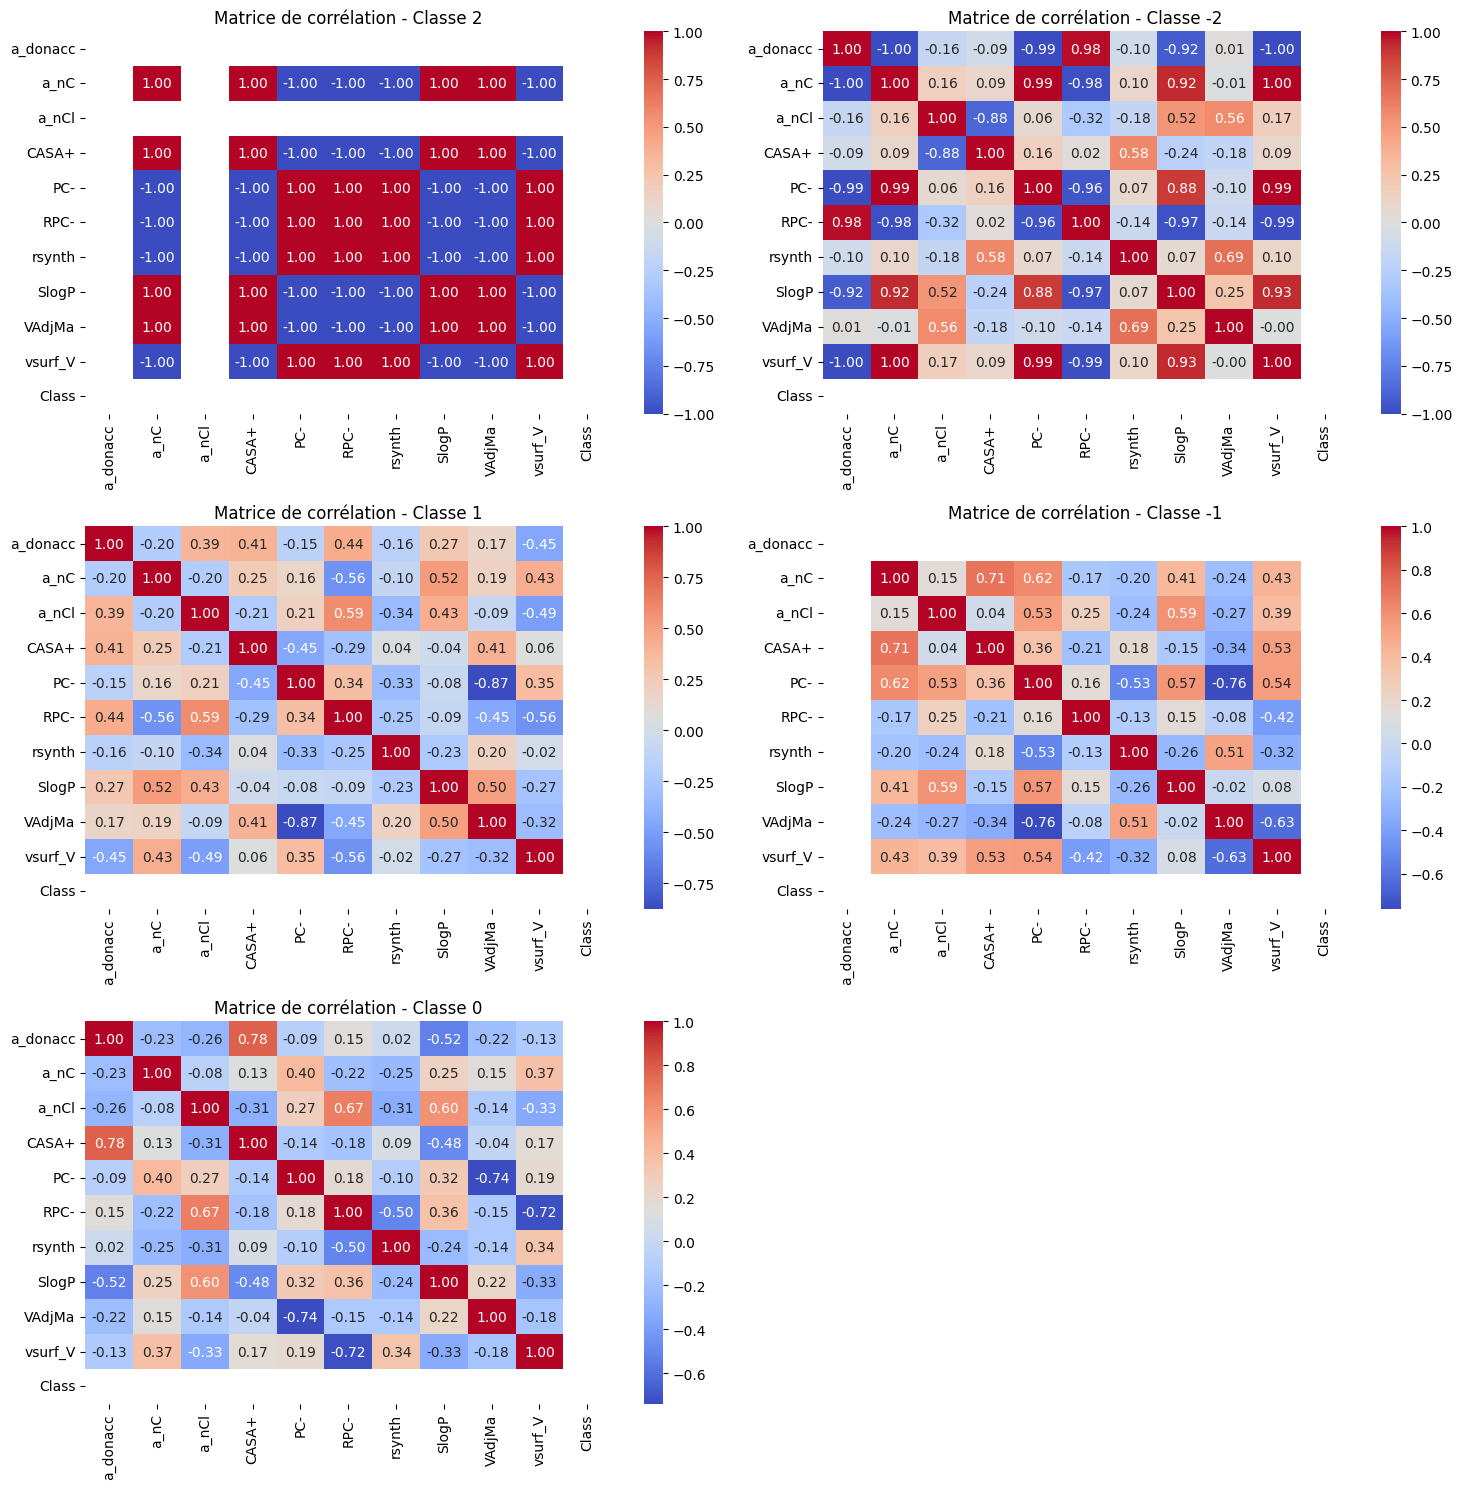

In [ ]:
plt.figure(figsize=(15, 15))

for i, classe in enumerate(donnees_propres["Class"].unique()):
    donnees_classe = donnees_propres[donnees_propres['Class'] == classe]
    
    # Convertir la catégorie en entier pour spécifier le sous-tracé
    plt.subplot(3, 2, i+1)
    
    sns.heatmap(donnees_classe.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Matrice de corrélation - Classe {classe}")

plt.tight_layout()
plt.show()

### C) Le nombre optimal de la composantes principales (CP) 

Transformation avec 2 composantes

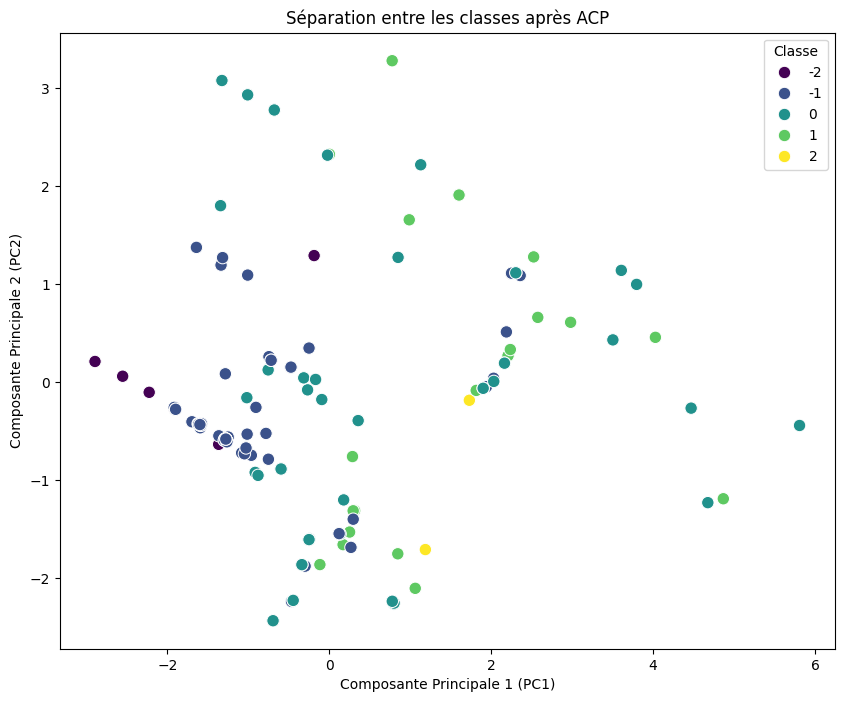

In [ ]:
X, y = donnees_propres.drop(columns=["Class"]), donnees_propres["Class"]

# Appliquer l'Analyse en Composantes Principales (ACP)
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X)

# Créer un DataFrame pour faciliter la visualisation avec seaborn
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Class'] = y

# Visualiser la séparation entre les classes
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=df_pca, palette='viridis', s=80)
plt.title('Séparation entre les classes après ACP')
plt.xlabel('Composante Principale 1 (PC1)')
plt.ylabel('Composante Principale 2 (PC2)')
plt.legend(title='Classe')
plt.show()

Transformation avec 3 composantes.

In [ ]:
# Appliquer l'Analyse en Composantes Principales (ACP)
pca = PCA(n_components=3) 
X_pca_train = pca.fit_transform(X)

# Créer un DataFrame pour faciliter la visualisation avec seaborn
df_pca = pd.DataFrame(data=X_pca_train, columns=['PC1', 'PC2', 'PC3'])
df_pca['Class'] = y

# Visualiser en 3D avec Plotly Express
fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color='Class', opacity=0.7,
                    title='Séparation entre les classes après ACP en 3D')
fig.update_layout(scene=dict(aspectmode="cube"), width=950,
                    height=700)

# Afficher la figure interactive
fig.show()

Nous voyons que avec 2 PC nous avons que 47.86% d'informations, ce qui donne une grande permet d'information. Donc on doit augmenter le nombre de composante pour diminuer la perte.
Avec 3 PC, nous avons 66.74% d'informations, ce qui peut être acceptable. Pour conclure, nous allons garder les 3 PCs, pour la suite de notre projet.

## 2. Mesure de distance

### a) Choix de la distance en d'après l'analyse de la matrice de corrélation.

La matrice de corrélation révèle des relations significatives entre les variables, illustrant à la fois des corrélations positives et négatives importantes entre les attributs. Ces corrélations indiquent que les variations d'une variable sont souvent accompagnées de variations prévisibles dans une autre, suggérant une interdépendance complexe dans l'ensemble des données. 
La distance de Mahalanobis intègre explicitement ces corrélations à travers la matrice de covariance, ce qui la rend équipée pour gérer les interdépendances entre les variables et particulièrement adaptée à notre ensemble de données.

**Vérification par le calcul des distances (Manhattan, Euclidienne, Mahalanobis)**

In [ ]:
X = donnees_propres.drop(columns=['Class']) 
y = donnees_propres['Class']

# Calculer les centroïdes pour chaque classe
centroids = X.groupby(y).mean()

# Calcul des distances de Manhattan et Euclidienne
manhattan_distances = cdist(X, centroids, metric='cityblock')  # Manhattan
euclidean_distances = cdist(X, centroids, metric='euclidean')  # Euclidienne

# Préparation pour la distance de Mahalanobis
cov_matrix = np.cov(X, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Calcul de la distance de Mahalanobis
mahalanobis_distances = np.zeros((X.shape[0], len(centroids)))
for i in range(len(X)):
    for j in range(len(centroids)):
        mahalanobis_distances[i, j] = mahalanobis(X.iloc[i], centroids.iloc[j], inv_cov_matrix)

# Assignation des classes basées sur la proximité aux centroïdes
nearest_classes_manhattan = pd.DataFrame(manhattan_distances, index=X.index, columns=centroids.index).idxmin(axis=1)
nearest_classes_euclidean = pd.DataFrame(euclidean_distances, index=X.index, columns=centroids.index).idxmin(axis=1)
nearest_classes_mahalanobis = pd.DataFrame(mahalanobis_distances, index=X.index, columns=centroids.index).idxmin(axis=1)

# Comparaison avec les classes réelles
comparison_df = pd.DataFrame({
    'Real Class': y,
    'Manhattan Nearest Class': nearest_classes_manhattan,
    'Euclidean Nearest Class': nearest_classes_euclidean,
    'Mahalanobis Nearest Class': nearest_classes_mahalanobis
})

# Calcul de la précision pour chaque mesure de distance
accuracy_manhattan = (comparison_df['Real Class'] == comparison_df['Manhattan Nearest Class']).mean()
accuracy_euclidean = (comparison_df['Real Class'] == comparison_df['Euclidean Nearest Class']).mean()
accuracy_mahalanobis = (comparison_df['Real Class'] == comparison_df['Mahalanobis Nearest Class']).mean()

# Affichage des précisions
print(f'Précision de Manhattan: {accuracy_manhattan:.2f}')
print(f'Précision Euclidienne: {accuracy_euclidean:.2f}')
print(f'Précision de Mahalanobis: {accuracy_mahalanobis:.2f}')

Précision de Manhattan: 0.45
Précision Euclidienne: 0.56
Précision de Mahalanobis: 0.69


Comme dans l'hypothèse établie dans la question a), nous voyons que la précision de la distance de Mahalanobis est mieux adaptée à nos données.

### b) Le choix de la matrice de covariance par classe ou pour toutes les données pour la distance de Mahalanobis.

In [ ]:
# Calculons le nombre d'échantillons par classe dans l'ensemble de données.
samples_per_class = data['Class'].value_counts()
samples_per_class

Class
Class -1    64
Class 0     62
Class 1     20
Class -2     6
Class 2      2
Name: count, dtype: int64

Le nombre d'échantillons par classe dans l'ensemble de données est le suivant :

- Classe -1 : 64 échantillons
- Classe 0 : 62 échantillons
- Classe 1 : 20 échantillons
- Classe -2 : 6 échantillons
- Classe 2 : 2 échantillons

Dans notre ensemble de données, certaines catégories n'ont que quelques exemples. Face à cela, utiliser une seule règle de mesure (une matrice de covariance unique) pour évaluer les distances entre les données est meilleur. C'est parce qu'essayer de créer des règles spécifiques pour chaque catégorie peut être difficile quand on n'a pas assez d'informations (ou d'exemples) pour certaines catégories.

## 3. Choix du modèle de classification

En résumé, nous avons choisis :
 
- ACP : 3 dimensions
- Distance : Mahalanobis
- Modèle : KNN

### a) Teste avec les méthodes 5-NN et Plus proche centroïde.

In [ ]:
k = 5
radius = 0.9

X, y = donnees_propres.drop(columns=["Class"]).to_numpy(), donnees_propres["Class"].to_numpy()

x_train, y_train = X_pca_train, y

print(x_train.shape, y_train.shape)

(154, 3) (154,)


In [ ]:
precisions = np.zeros((2, 1))

K-NN avec la distance de Mahalanobis et les 3 composants principales.

In [ ]:
covariance_inverse = np.linalg.inv(np.cov(x_train, rowvar=False))

# Utiliser NearestNeighbors avec la distance Mahalanobis pour l'ensemble d'entraînement
model = KNeighborsClassifier(n_neighbors=k, metric="mahalanobis", metric_params={'V': covariance_inverse})

# Entraînement du modèle sur les données d'entraînement
model.fit(x_train, y_train)

# Prédiction sur les données de test
y_pred = model.predict(x_train)

# Calculer et afficher l'exactitude (accuracy) pour l'ensemble de test
accuracy = accuracy_score(y_train, y_pred)
precisions[0, 0] = round(accuracy, 4)
print("Accuracy:", accuracy)

Accuracy: 0.7727272727272727


Parzen avec la distance de Mahalanobis et les 3 composants principales.

In [ ]:
covariance_inverse = np.linalg.inv(np.cov(x_train, rowvar=False))

# Utiliser NearestNeighbors avec la distance Mahalanobis pour l'ensemble d'entraînement
model = RadiusNeighborsClassifier(radius=radius, metric="mahalanobis", metric_params={'V': covariance_inverse})

# Entraînement du modèle sur les données d'entraînement
model.fit(x_train, y_train)

# Prédiction sur les données de test
y_pred = model.predict(x_train)

# Calculer et afficher l'exactitude (accuracy) pour l'ensemble de test
accuracy = accuracy_score(y_train, y_pred)
precisions[1, 0] = round(accuracy, 4)
print("Accuracy:", accuracy)

Accuracy: 0.8181818181818182


##### Un tableau comparatif des distances sur les méthodes K-NN et Parzen

In [ ]:
pd.DataFrame(precisions, columns=["Manhattan"], index=["K-NN", "Parzen"])

Manhattan
K-NN       0.7727
Parzen     0.8182

Nous avons obtenu la meilleure précision pour le modèle de Parzen avec k=5 et la distance de Mahalanobis. Nous remarquons cependant que à k=2, le résultat sera meilleur parce que k est trop grand pour le nombre d'échantillons de certaines classes et ainsi, le modèle incorpore trop de bruit en considérant des voisins qui sont loin de l'observation cible.

Par exemple, la classe 2 contient seulement 2 échantillons, c'est à dire que pour les 5 voisins, elle aura seulement 2 appartenant à la classe 2 et 3 appartenant à d'autres classes, réduisant ainsi la précision de la classification et résultant en une précision générale plus faible. 

### b) Les mélanges de distributions gaussiennes.

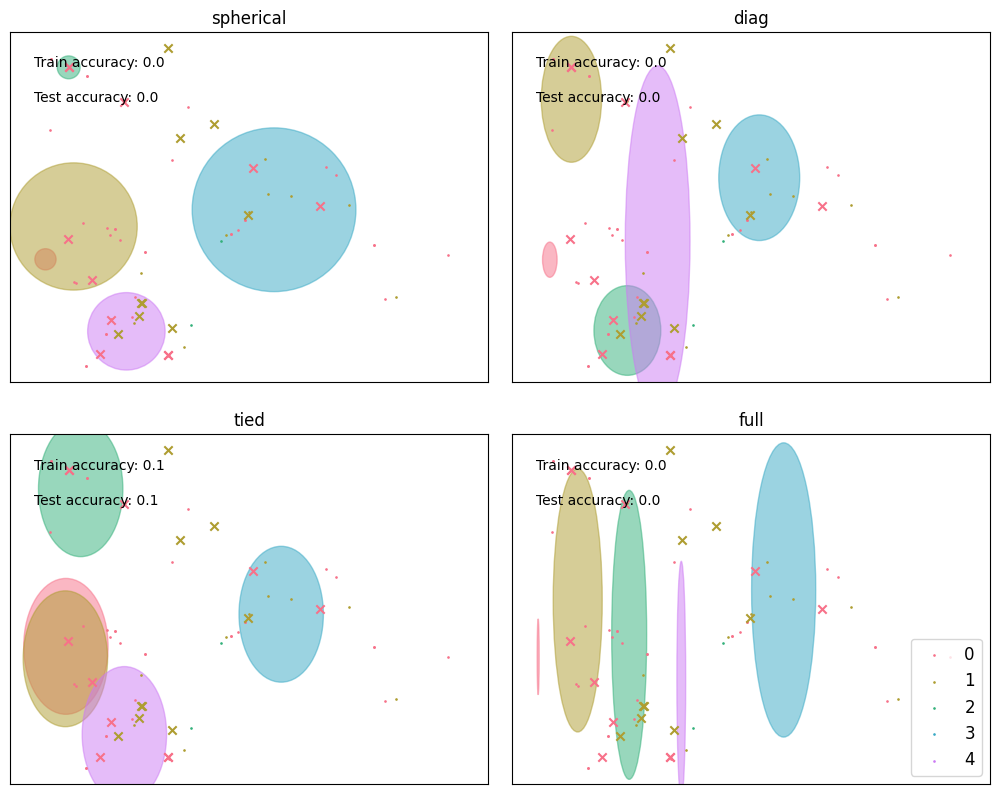

In [ ]:
# Author: Ron Weiss <ronweiss@gmail.com>, Gael Varoquaux
# Modified by Thierry Guillemot <thierry.guillemot.work@gmail.com>
# Modified by Aida Ouangraoua <aida.ouangraoua@usherbrooke.com>
# Modified by Nadia Tahiri <Nadia.Tahiri@USherbrooke.com>
# Initial code at https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html
import matplotlib as mpl
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X_pca,y,test_size=0.25,random_state=0)

colors = sns.color_palette("husl",5)

def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1], color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

n_classes = 5

# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=n_classes,
            covariance_type=cov_type, max_iter=100, random_state=0)
            for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)

plt.figure(figsize=(5 * n_estimators // 2, 8))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05, left=.01, right=.99)

for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[Y_train == i].mean(axis=0) for i in range(-2, 3)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = X_pca[y == n]
        plt.scatter(data[:, 0], data[:, 1], s = 0.8, color=color,
                    label=n)
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[Y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    Y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(Y_train_pred==Y_train)#
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy, transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred==Y_test)
    
    #np.mean(y_test_pred.ravel() == Y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy, transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))

plt.show()

Nous avons expérimenté le GMM avec quatres options de covariance : tied, full, diag et spherical . Les résultats ont révélé que l'option tied a montré une nette amélioration de la précision lors de l'entraînement. En revanche, les autres options, notamment 'full', ont abouti à des accuracies nulles.

Cette préférence pour la covariance tied peut être expliquée par la taille limitée de notre ensemble de données et le nombre restreint d'exemples par classe. En optant pour une matrice de covariance partagée, nous réduisons la complexité du modèle, ce qui est avantageux lorsque l'information par classe est limitée. Les autres options, en tentant d'estimer des structures de covariance distinctes pour chaque classe, peuvent rencontrer des difficultés en raison du manque de données.

Finalement, KNN semble avoir une meilleure performance et est donc le plus adéquat.

## 4. Application

### Test sur les données de test.csv.

#### Chargement et prétraitement des données de test.

Chargement des données de test.

In [ ]:
test_set = pd.read_excel("test_TP1.xlsx")
test_set

SMILES         Class       apol  \
0              Clc1c(Cl)c2c(oc3c2cc(Cl)c(Cl)c3)cc1Cl  À déterminer  34.822380   
1  Clc1c(Cl)c(Cl)cc(c1Cl)-c1c(Cl)c(Cl)c([O-])c(Cl)c1  À déterminer  38.515587   

        ASA+       ASA-  a_count  a_donacc  a_heavy  a_hyd       a_IC  ...  \
0  91.950394  357.86932       21         0       18     15  32.854588  ...   
1  65.726738  456.87869       22         0       20     18  33.436462  ...   

         VSA    vsa_acc    vsa_hyd    vsa_pol   vsurf_A    vsurf_R  \
0  262.13361   0.000000  222.35103   0.000000  0.171541   0.372073   
1  306.71164  13.566921  274.74591  13.566921  7.191214  15.597743   

      vsurf_S   vsurf_V     Weight  zagreb  
0   -4.843119 -0.190411  340.41998     102  
1 -203.029548 -7.982248  410.31799     106  

[2 rows x 76 columns]

Mise à l'échelle des données de test.

In [ ]:
# Standardisation des données des tests.
test_set[columns_numerics_scaled] = scaler.transform(test_set[columns_numerics_scaled])
test_set

SMILES         Class      apol  \
0              Clc1c(Cl)c2c(oc3c2cc(Cl)c(Cl)c3)cc1Cl  À déterminer  0.035684   
1  Clc1c(Cl)c(Cl)cc(c1Cl)-c1c(Cl)c(Cl)c([O-])c(Cl)c1  À déterminer  0.658256   

       ASA+      ASA-   a_count  a_donacc   a_heavy    a_hyd     a_IC  ...  \
0 -0.222362 -0.020370 -0.596181 -0.339848 -0.156487 -0.46897 -0.10818  ...   
1 -0.646790  0.875425 -0.391244 -0.339848  0.203199  0.12955 -0.04790  ...   

        VSA   vsa_acc   vsa_hyd   vsa_pol   vsurf_A   vsurf_R   vsurf_S  \
0 -0.212379 -0.550406 -0.294600 -0.602549 -0.839770  0.110347  0.842873   
1  0.634917  0.374163  0.582729  0.297082  1.829943  0.110347 -1.858370   

    vsurf_V    Weight    zagreb  
0  0.840100 -0.146338  0.019454  
1 -1.907189  0.381104  0.139292  

[2 rows x 76 columns]

Nous gardons seulement les colonnes qui restent après le prétraitement.

In [ ]:
test_set = test_set[donnees_propres.columns.to_list()]
test_set

a_donacc      a_nC     a_nCl     CASA+       PC-      RPC-    rsynth  \
0 -0.339848  0.142302  0.641759 -0.345328  0.497948  0.302091 -0.689319   
1 -0.339848  0.142302  1.321009 -0.575203  0.104465  2.247190 -0.689319   

      SlogP    VAdjMa   vsurf_V         Class  
0  0.551891  0.164868  0.840100  À déterminer  
1  1.181847  0.368652 -1.907189  À déterminer

In [ ]:
x_test = test_set.drop(columns=["Class"])
x_test

a_donacc      a_nC     a_nCl     CASA+       PC-      RPC-    rsynth  \
0 -0.339848  0.142302  0.641759 -0.345328  0.497948  0.302091 -0.689319   
1 -0.339848  0.142302  1.321009 -0.575203  0.104465  2.247190 -0.689319   

      SlogP    VAdjMa   vsurf_V  
0  0.551891  0.164868  0.840100  
1  1.181847  0.368652 -1.907189

Appliquer la transformation par ACP à nos données de test.

In [ ]:
x_test = pca.transform(x_test)
pd.DataFrame(x_test, columns=["PC1", "PC2", "PC3"])

PC1       PC2       PC3
0 -1.335817 -0.014432 -0.150661
1 -1.295037  3.134022  0.071211

#### Effectuer les prédictions.

In [ ]:
predictions = np.zeros((2, 1)).tolist()

K-NN avec la distance de Mahalanobis et les 3 composants principales.

In [ ]:
covariance_inverse = np.linalg.inv(np.cov(x_train, rowvar=False))

# Utiliser NearestNeighbors avec la distance Mahalanobis pour l'ensemble d'entraînement
model = KNeighborsClassifier(n_neighbors=k, metric="mahalanobis", metric_params={'V': covariance_inverse})

# Entraînement du modèle sur les données d'entraînement
model.fit(x_train, y_train)

# Prédiction sur les données de test
y_pred = model.predict(x_test)
predictions[0][0] = "[{}]".format(", ".join([str(y_p) for y_p in y_pred.tolist()]))
print("Les classes predites:", y_pred)

Les classes predites: [-1  0]


Parzen avec la distance de Mahalanobis et les 3 composants principales.

In [ ]:
covariance_inverse = np.linalg.inv(np.cov(x_train, rowvar=False))

# Utiliser NearestNeighbors avec la distance Mahalanobis pour l'ensemble d'entraînement
model = RadiusNeighborsClassifier(radius=radius, metric="mahalanobis", metric_params={'V': covariance_inverse})

# Entraînement du modèle sur les données d'entraînement
model.fit(x_train, y_train)

# Prédiction sur les données de test
y_pred = model.predict(x_test)
y_test = y_pred
predictions[1][0] = "[{}]".format(", ".join([str(y_p) for y_p in y_pred.tolist()]))
print("Les classes predites:", y_pred)

Les classes predites: [-1  0]


Un tableau comparatif des distances sur les méthodes K-NN et Parzen

In [ ]:
pd.DataFrame(predictions, columns=["Mahalanobis"], index=["K-NN", "Parzen"])

Mahalanobis
K-NN       [-1, 0]
Parzen     [-1, 0]

Nous avons vu que les 5-NN et plus proche centroïde nous donnent les mêmes predictions pour les données de teste. Ce qui confirme les résultats de précisions obtenu dans la question 3. a).

### Comparaison des méthodes et des distances pour vérification du choix de la distance de Mahalanobis par rapport aux distances Euclidienne et Manhattan.

L'objectif de cette comparaison entre les différentes méthodes (K-NN et Plus proche centroïde) en utilisant les distances (Euclidienne, Manhattan et Mahalanobis), est de vérifier tous les decisions prises dans tous les questions que nous avons fait dans notre projet.

#### Entraînement

In [ ]:
precisions = np.zeros((2, 3))

##### K-NN

Distance de Mahattan

In [ ]:
model = KNeighborsClassifier(n_neighbors=k, p=1, metric="minkowski")
model.fit(x_train, y_train)

y_pred = model.predict(x_train)

accuracy = accuracy_score(y_train, y_pred)
precisions[0, 0] = round(accuracy, 4)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7662337662337663


Distance Euclidienne

In [ ]:
model = KNeighborsClassifier(n_neighbors=k, p=2, metric="minkowski")
model.fit(x_train, y_train)

y_pred = model.predict(x_train)

accuracy = accuracy_score(y_train, y_pred)
precisions[0, 1] = round(accuracy, 4)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7662337662337663


Mahalanobis

In [ ]:
covariance_inverse = np.linalg.inv(np.cov(x_train, rowvar=False))

model = KNeighborsClassifier(n_neighbors=k, metric="mahalanobis", metric_params={'V': covariance_inverse})
model.fit(x_train, y_train)

y_pred = model.predict(x_train)

accuracy = accuracy_score(y_train, y_pred)
precisions[0, 2] = round(accuracy, 4)
print("Accurancy:", accuracy)

Accurancy: 0.7727272727272727


##### Parzen

Manhattan

In [ ]:
model = RadiusNeighborsClassifier(radius=radius, p=1, metric="minkowski")
model.fit(x_train, y_train)

y_pred = model.predict(x_train)

accuracy = accuracy_score(y_train, y_pred)
precisions[1, 0] = round(accuracy, 4)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8051948051948052


Euclidienne

In [ ]:
model = RadiusNeighborsClassifier(radius=radius, p=2, metric="minkowski")
model.fit(x_train, y_train)

y_pred = model.predict(x_train)

accuracy = accuracy_score(y_train, y_pred)
precisions[1, 1] = round(accuracy, 4)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7662337662337663


Mahalanobis

In [ ]:
covariance_inverse = np.linalg.inv(np.cov(x_train, rowvar=False))

model = RadiusNeighborsClassifier(radius=radius, metric="mahalanobis", metric_params={'V': covariance_inverse})
model.fit(x_train, y_train)

y_pred = model.predict(x_train)

accuracy = accuracy_score(y_train, y_pred)
precisions[1, 2] = round(accuracy, 4)
print("Accurancy:", accuracy)

Accurancy: 0.8181818181818182


##### Un tableau comparatif des distances sur les méthodes K-NN et Parzen

In [ ]:
pd.DataFrame(precisions, columns=["Manhattan", "Euclidienne", "Mahalanobis"], index=["K-NN", "Parzen"])

Manhattan  Euclidienne  Mahalanobis
K-NN       0.7662       0.7662       0.7727
Parzen     0.8052       0.7662       0.8182

#### Teste

In [ ]:
predictions = np.zeros((2, 3)).tolist()

##### K-NN

Distance de Mahattan

In [ ]:
model = KNeighborsClassifier(n_neighbors=k, p=1, metric="minkowski")
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
predictions[0][0] = "[{}]".format(", ".join([str(y_p) for y_p in y_pred.tolist()]))
print("Les classes predites:", y_pred)

Les classes predites: [-1  0]


Distance Euclidienne

In [ ]:
model = KNeighborsClassifier(n_neighbors=k, p=2, metric="minkowski")
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
predictions[0][1] = "[{}]".format(", ".join([str(y_p) for y_p in y_pred.tolist()]))
print("Les classes predites:", y_pred)

Les classes predites: [-1  0]


Mahalanobis

In [ ]:
covariance_inverse = np.linalg.inv(np.cov(x_train, rowvar=False))

model = KNeighborsClassifier(n_neighbors=k, metric="mahalanobis", metric_params={'V': covariance_inverse})
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
predictions[0][2] = "[{}]".format(", ".join([str(y_p) for y_p in y_pred.tolist()]))
print("Les classes predites:", y_pred)

Les classes predites: [-1  0]


##### Parzen

Manhattan

In [ ]:
model = RadiusNeighborsClassifier(radius=radius, p=1, metric="minkowski")
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
predictions[1][0] = "[{}]".format(", ".join([str(y_p) for y_p in y_pred.tolist()]))
print("Les classes predites:", y_pred)

Les classes predites: [-1  0]


Euclidienne

In [ ]:
model = RadiusNeighborsClassifier(radius=radius, p=2, metric="minkowski")
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
predictions[1][1] = "[{}]".format(", ".join([str(y_p) for y_p in y_pred.tolist()]))
print("Les classes predites:", y_pred)

Les classes predites: [-1  0]


Mahalanobis

In [ ]:
covariance_inverse = np.linalg.inv(np.cov(x_train, rowvar=False))

model = RadiusNeighborsClassifier(radius=radius, metric="mahalanobis", metric_params={'V': covariance_inverse})
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
predictions[1][2] = "[{}]".format(", ".join([str(y_p) for y_p in y_pred.tolist()]))
print("Les classes predites:", y_pred)

Les classes predites: [-1  0]


##### Un tableau comparatif des distances sur les méthodes K-NN et Parzen

In [ ]:
pd.DataFrame(predictions, columns=["Manhattan", "Euclidienne", "Mahalanobis"], index=["K-NN", "Parzen"])

Manhattan Euclidienne Mahalanobis
K-NN     [-1, 0]     [-1, 0]     [-1, 0]
Parzen   [-1, 0]     [-1, 0]     [-1, 0]

# Sauvegarde des données finales

Enregistrer les données nettoyées avec les 10 meilleurs attributs avant application de l'ACP.

In [ ]:
donnees_propres.to_excel('Groupe_3_tp1_QSAR_propres_sans_ACP.xlsx', index=False)

Enregistrer les données d'entraînement nettoyées après l'ACP.

In [ ]:
donnees_acp_train = pd.DataFrame(x_train, columns=["PC1", "PC2", "PC3"])
donnees_acp_train["Class"] = y_train
donnees_acp_train.head()

PC1       PC2       PC3  Class
0  1.729937 -0.184132  4.602342      2
1  1.186675 -1.706702 -1.635292      2
2 -2.893409  0.211520  0.890110     -2
3 -0.187253  1.291506  0.093568     -2
4 -2.551871  0.060979  0.672138     -2

In [ ]:
donnees_acp_train.to_excel("Groupe_3_tp1_QSAR_trainset_apres_ACP.xlsx", index=False)

Enregistrer les données de teste nettoyées après l'ACP et les classes prédictes.

In [ ]:
donnees_acp_test = pd.DataFrame(x_test, columns=["PC1", "PC2", "PC3"])
donnees_acp_test["Class"] = y_test
donnees_acp_test

PC1       PC2       PC3  Class
0 -1.335817 -0.014432 -0.150661     -1
1 -1.295037  3.134022  0.071211      0

In [ ]:
donnees_acp_test.to_excel("Groupe_3_tp1_QSAR_testset_apres_ACP.xlsx", index=False)